<a href="https://colab.research.google.com/github/eueu29/AIFFEL_quest/blob/main/Main_quest/Main_Pokemon/MainQuest02_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가랏 몬스터볼! 전설의 포켓몬 찾아 삼만리!

데이터 출처 : https://www.kaggle.com/datasets/abcsds/pokemon

# Step1. 데이터 살펴보기

### 사용할 라이브러리 불러오기

numpy, pandas : 1차원 또는 2차원 형식의 표 데이터를 다루기에 최적화된 라이브러리    
seaborn, matplotlib : 데이터를 그래프 등으로 시각화

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


### 사용할 csv 데이터 불러오기

In [2]:
import csv

csv_path = open('/content/drive/MyDrive/Colab Notebooks/Pokemon.csv')   # 파일 열기
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


원본 데이터는 그대로 두고, pokemon이라는 변수로 데이터를 복사해와서 사용하는 습관을 들이자!

In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## feature들 확인하기

#### 데이터 구성

In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


shape 함수로 확인 : (800,13)   
즉, 800마리의 포켓몬, 13가지의 특성을 담고있는 데이터임을 확인가능
<br><br>
**<특성>** <br>
\# : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다.<br>
Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다.<br>
Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. <br>
Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다.<br>
Total : 전체 6가지 스탯의 총합. <br>
HP : 포켓몬의 체력.   <br>
Attack : 물리 공격력. (scratch, punch 등) <br>
Defense : 물리 공격에 대한 방어력.   <br>
Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) <br>
Sp. Def : 특수 공격에 대한 방어력.    <br>
Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다)    <br>
Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다.<br>
Legendary : 전설의 포켓몬 여부. !! Target feature !! <br>
<br>
Name, Type1, Type2 는 object값
Legendary 는 bool값을 가진다

#### 전설의 포켓몬과 일반 포켓몬 데이터셋 만들기

In [5]:
 # 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [6]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


735 마리의 일반포켓몬, 65마리의 전설의 포켓몬으로 총 800마리의 포켓몬이군!

#### 결측치 확인하기

In [7]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

type2에만 결측치가 있네? 386마리는 Type1 특성만 가지고 있겠군

#### 전체 컬럼 이해하기

In [8]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### 'ID number' 속성 분석하기

In [9]:
len(set(pokemon["#"]))

721

전체 포켓몬이 800마리인데 # 값은 721 밖에 되지 않는다?! **= 중복되는 값이 존재한다!**

#### 'Name' 속성 분석하기

In [10]:
len(set(pokemon["Name"]))

800

중복되는 이름을 가진 포켓몬은 없다

##### ***특정 단어가 들어가있는 이름이 많은지 파악하기***

In [11]:
legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
61,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
62,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
63,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [12]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


**특정 이름이 전설의 포켓몬을 파악하는데 도움이 될 수 있겠군!**

##### 이름 길이 분석해보기

In [13]:
# name_count 칼럼을 생성하여 이름 길이 입력
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [14]:
# name_count 칼럼을 생성하여 이름 길이 입력
ordinary["name_count"] = ordinary["Name"].apply(lambda i : len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


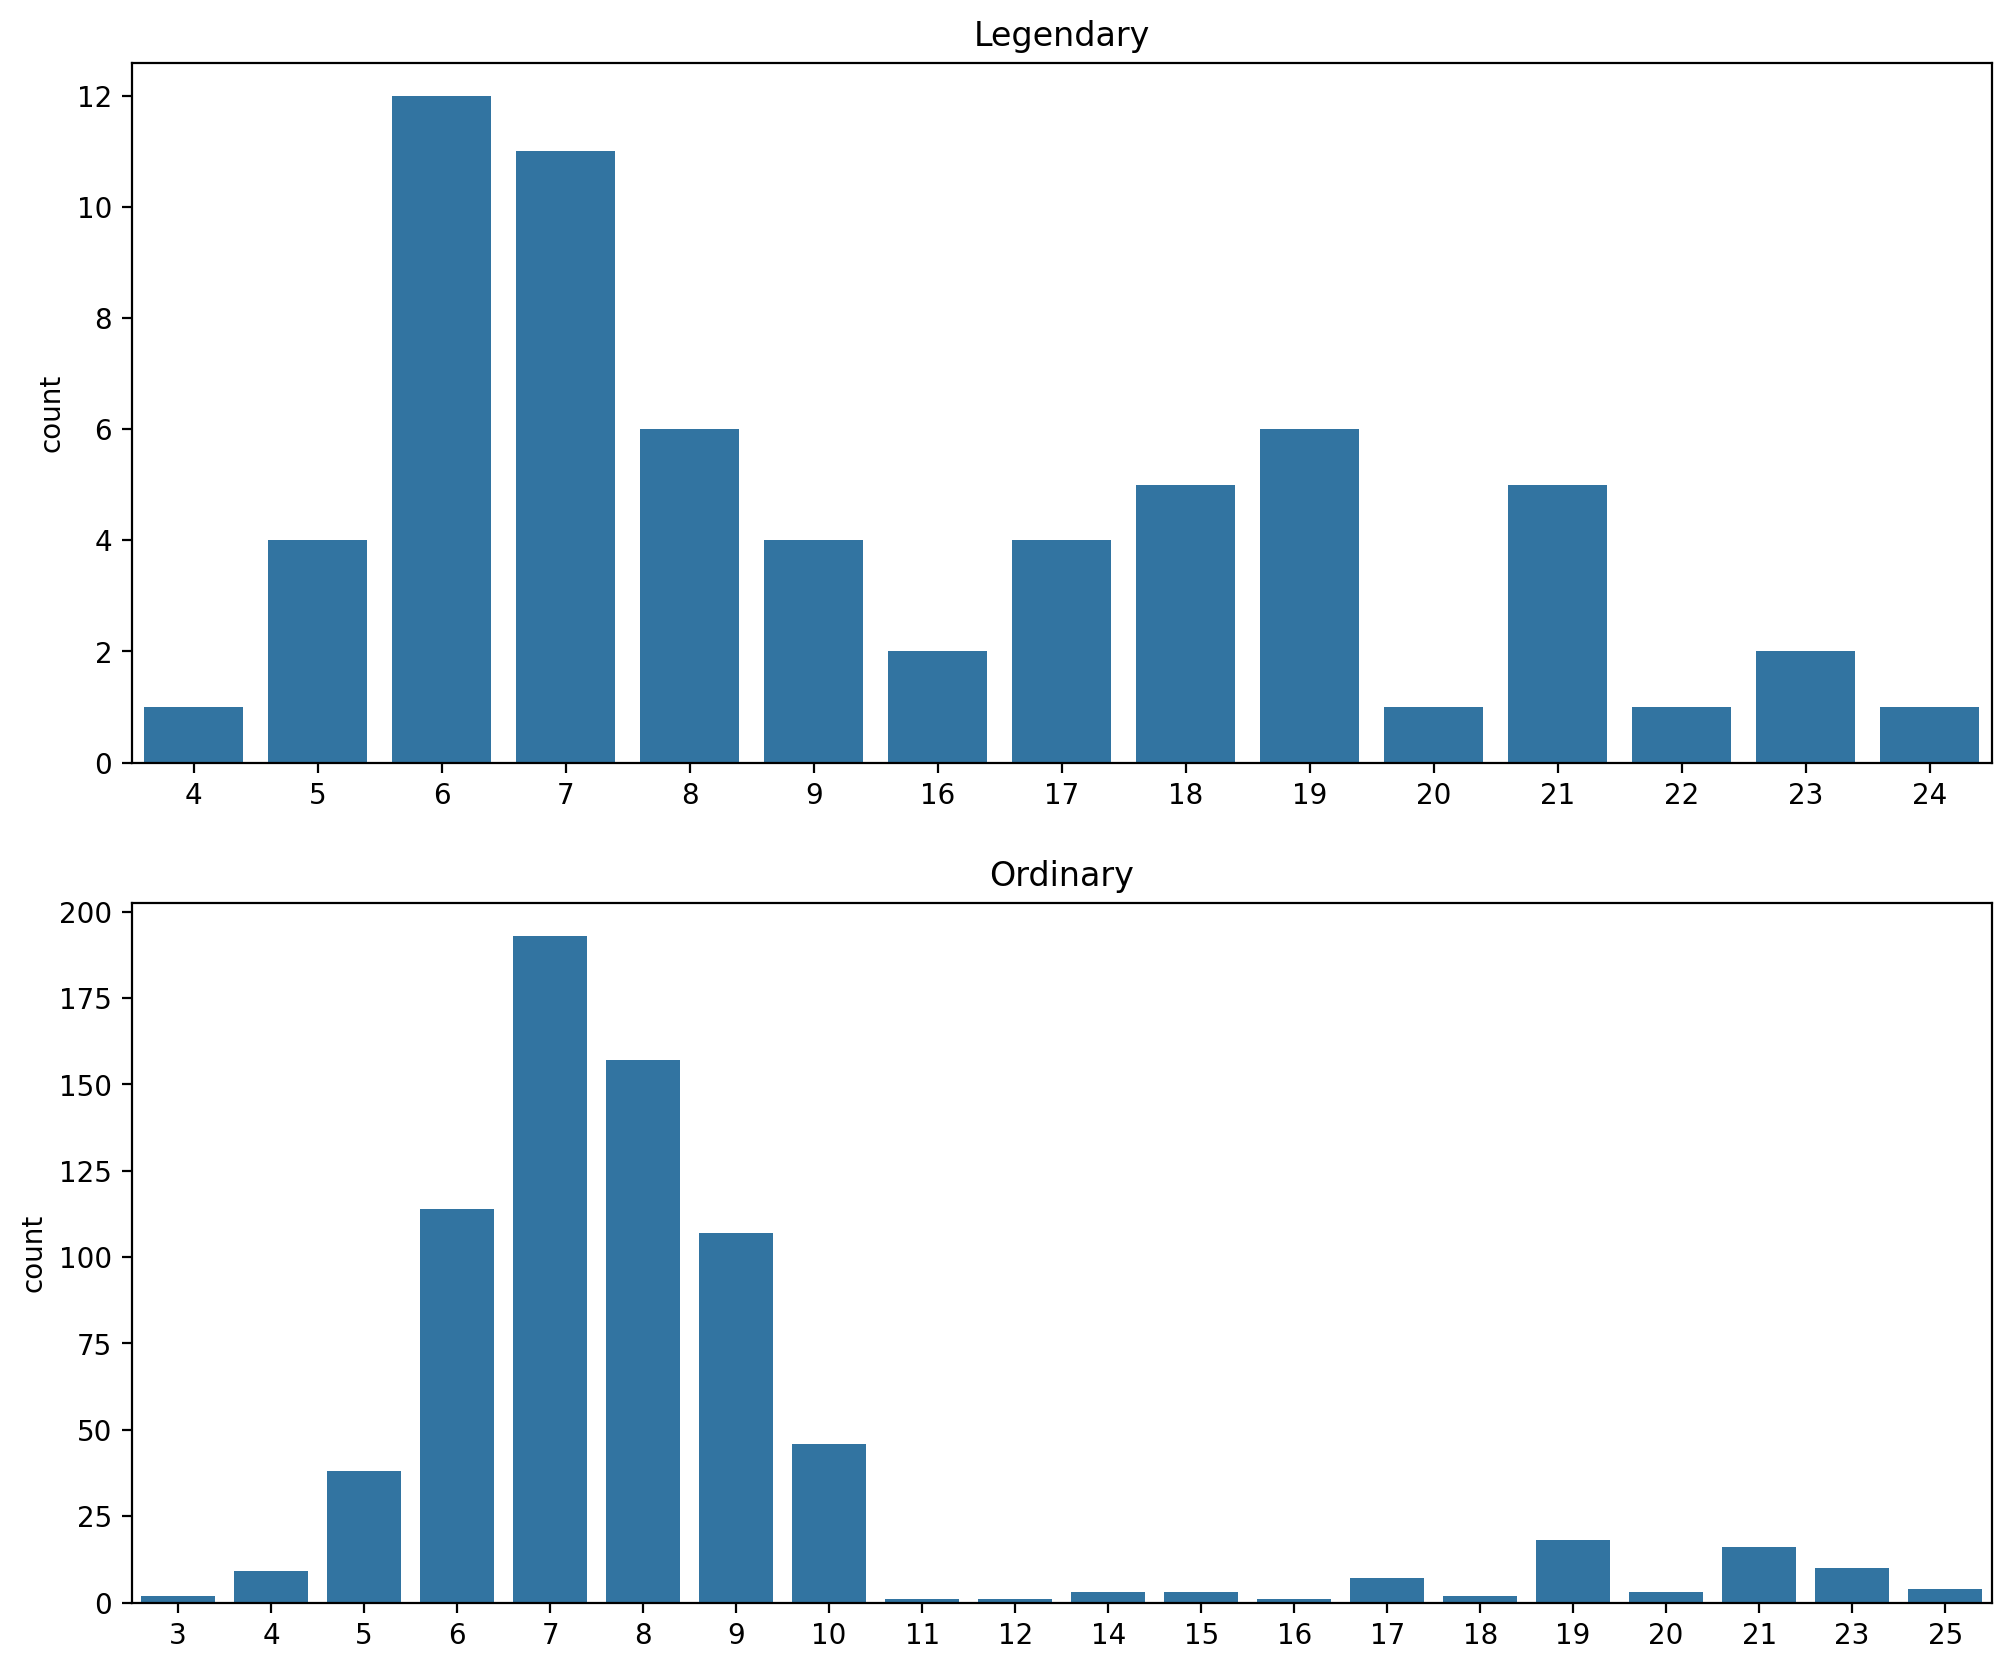

In [15]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [16]:
# 전설의 포켓몬의 이름이 10% 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [17]:
# 일반 포켓몬의 이름이 10% 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


**이름의 길이가 길수록 전설의 포켓몬일 가능성이 높겠군!**

#### 특정 이름을 가지고 있거나, 이름의 길이가 길 수록 전설의 포켓몬일 가능성이 높겠군!

#### 'Type'속성 분석하기

In [18]:
# 각 속성의 종류가 몇개인지 확인
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [19]:
set(pokemon["Type 1"])

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

In [20]:
set(pokemon["Type 2"])

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 nan}

In [21]:
# 차집합 확인해보기
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

type2 에 nan, 즉 결측값이 존재하는것 말고는 Type 1 과 같은 값을 가지는군!

In [22]:
# 모든 type을 types 변수에 저장하기
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Normal', 'Steel', 'Fairy', 'Poison', 'Ghost', 'Rock', 'Ground', 'Electric', 'Bug', 'Grass', 'Fighting', 'Psychic', 'Dragon', 'Water', 'Flying', 'Dark', 'Ice', 'Fire']


In [23]:
# type2에 결측값을 가진 항목이 몇개인지 확인하기
pokemon["Type 2"].isna().sum()

386

##### 그래프를 통해 일반 포켓몬, 전설의 포켓몬의 type 분포 확인하기: <br>
**countplot**

###### Type1

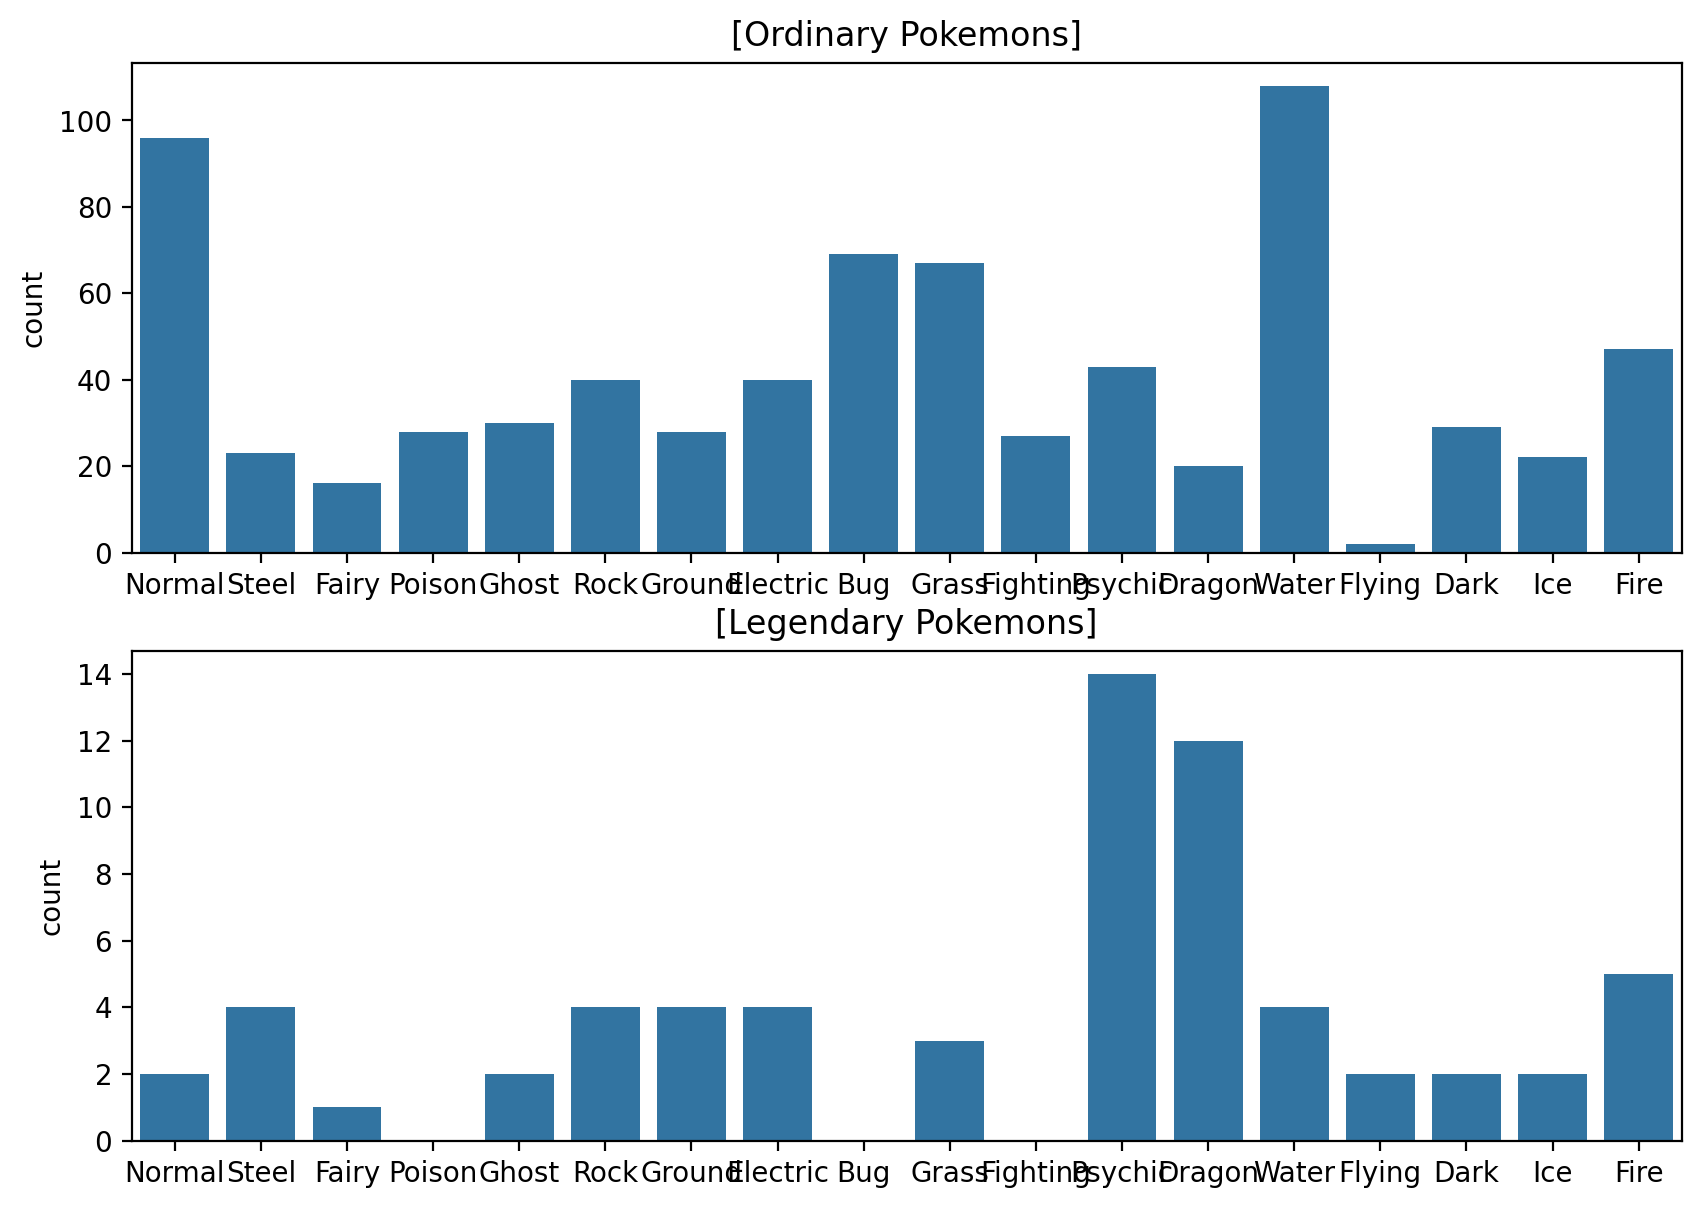

In [24]:
# 그래프 크기 설정
plt.figure(figsize=(10, 7))

# 일반 포켓몬의 'Type 1' countplot
plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

# 전설의 포켓몬의 'Type 1' countplot
plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [25]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


일반 포켓몬에서는 'Type 1 '속성으로 normal, grass, bug 속성이 많고,<br>   전설의 포켓몬에서는'Type1' 속성으로 flying 속성을 가진 포켓몬이 50으로 제일 많고 Dragon, Psychic 속성 순으로 많다는것과,<br>poison, fighting, bug 속성의 전설의 포켓몬은 없다는것을 알 수있음

###### Type 2

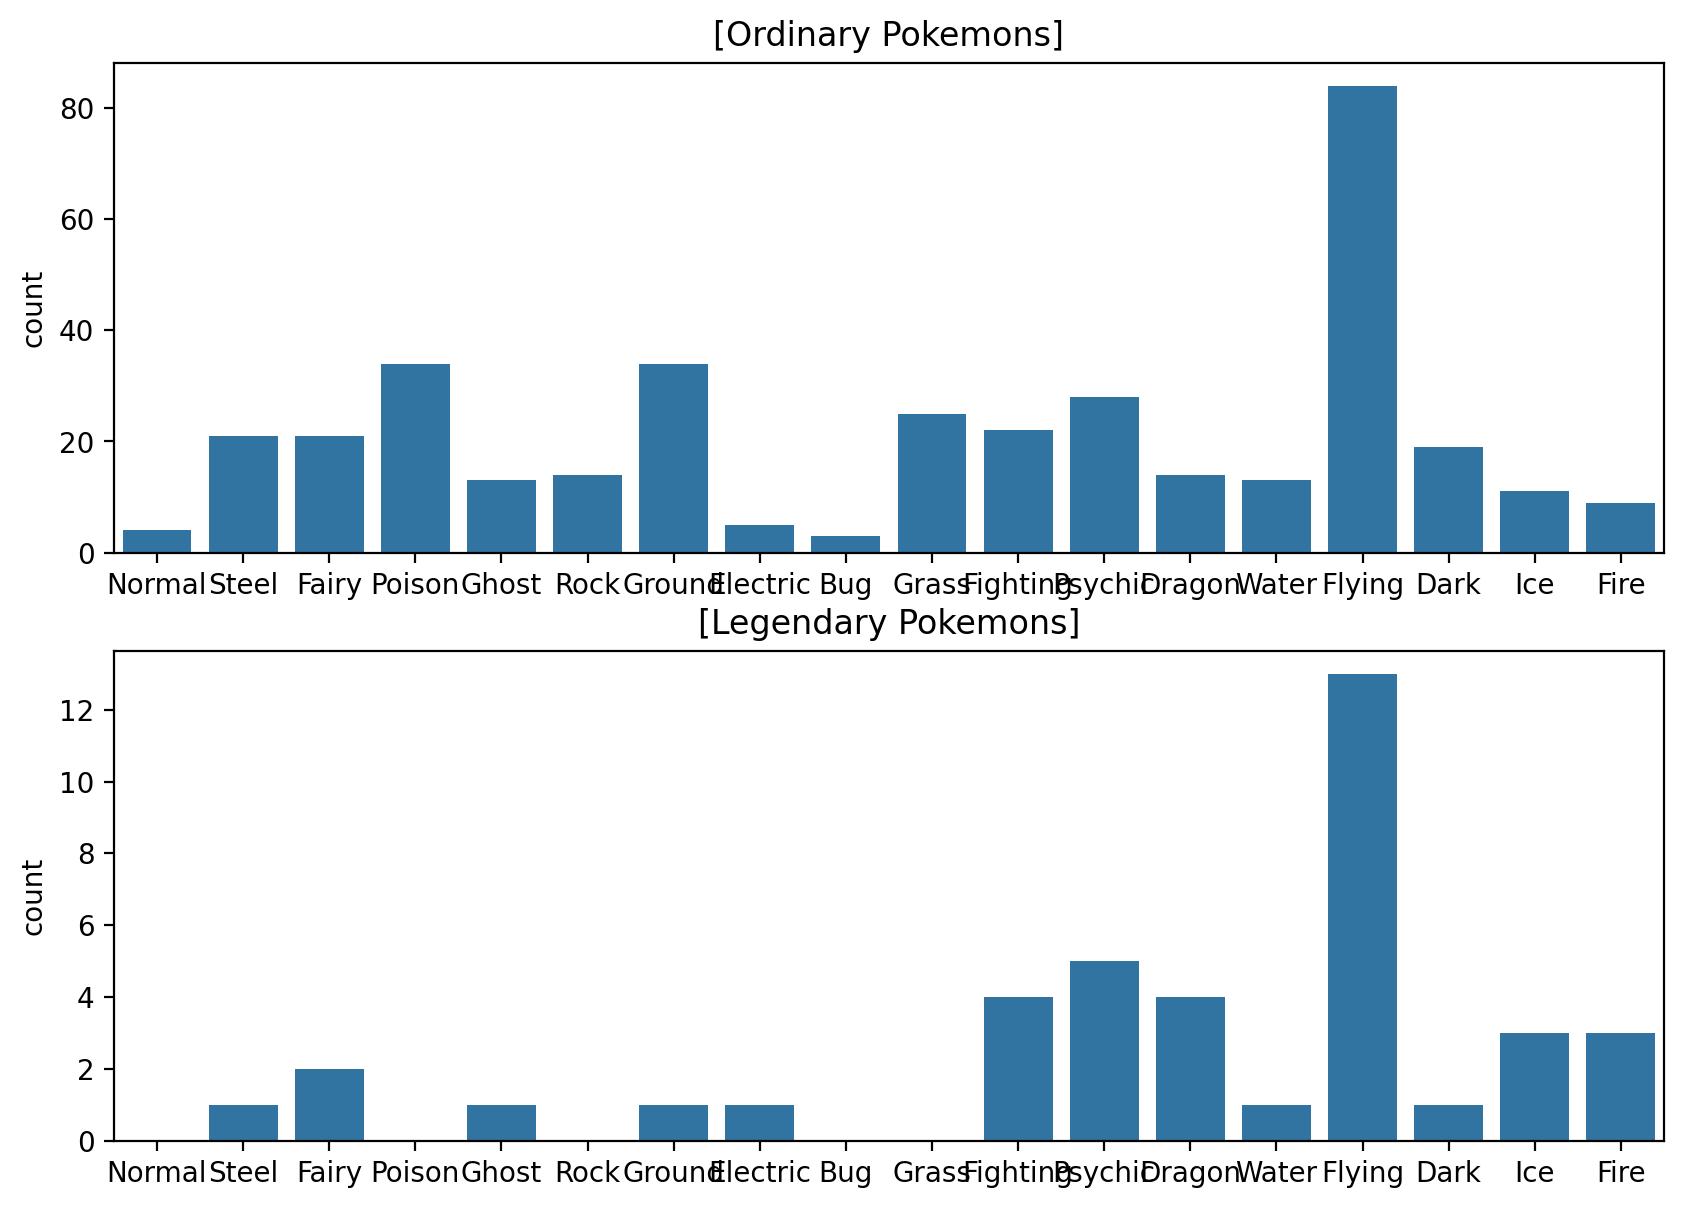

In [26]:
# 그래프 크기 설정
plt.figure(figsize=(10, 7))

# 일반 포켓몬의 'Type 2' countplot
plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

# 전설의 포켓몬의 'Type 2' countplot
plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [27]:
# Type2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


전설의 포켓몬에서는 'Type2'속성으로 rock, bug, poison, normal, grass 속성이 없다는것을 알 수 있음

####따라서, Type값은 legendary인지 아닌지 예측하는데 중요한 영향을 끼칠 것이다.

#### 'Total'속성 분석하기

sum(axis=1) 함수는 해당 데이터프레임의 항목(가로축)의 총합을 계산해줌

In [28]:
# total과 stats의 합계 값이 일치하는지 확인
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
count_total_stats = pokemon[pokemon['Total'].values == pokemon[stats].values.sum(axis=1)]
len(count_total_stats)

800

전부 일치함. 즉, Total 값은 stat을의 합이 맞다.

##### 그래프로 분포 확인하기
**scatterplot**

'Total'값의 scatterplot

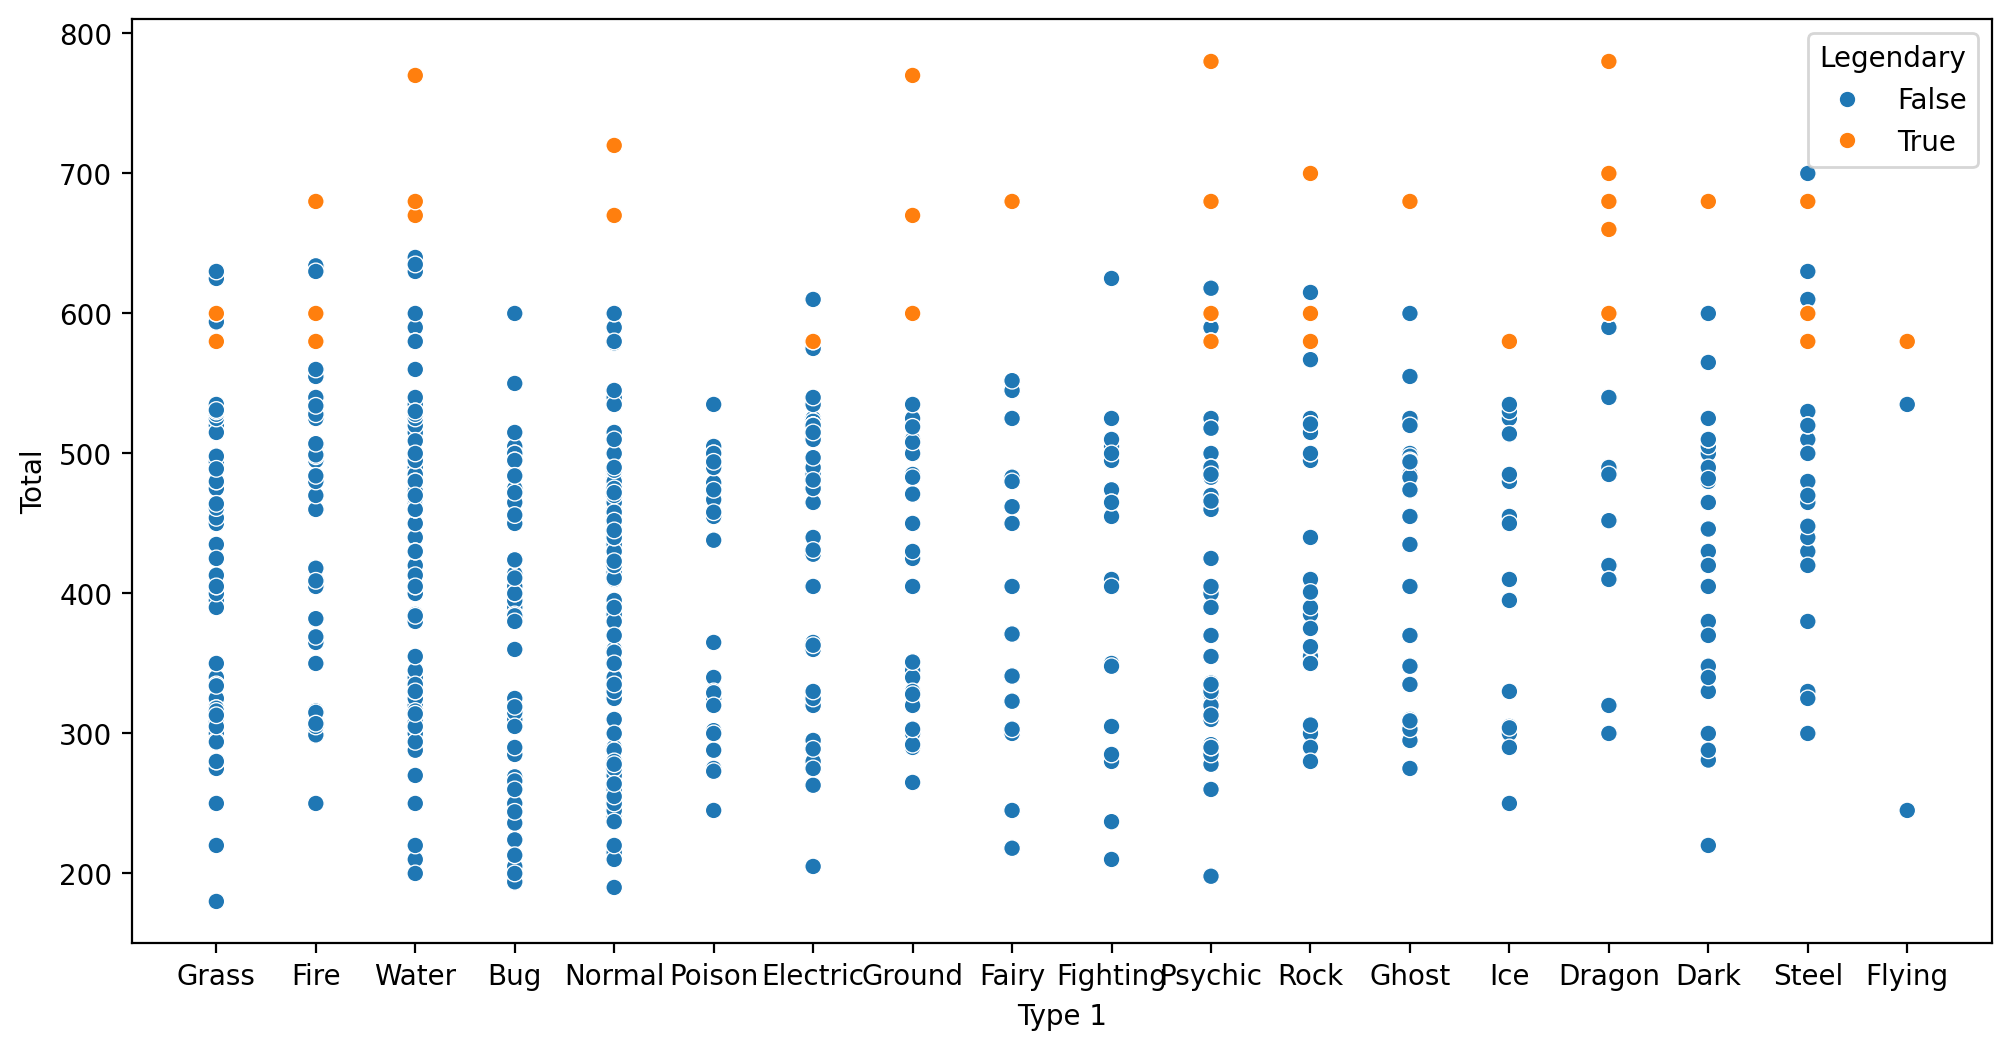

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")  # legendary를 기준으로 유,무 구분해서 보여줌
plt.show()

각각의 stat의 scatterplot 확인하기

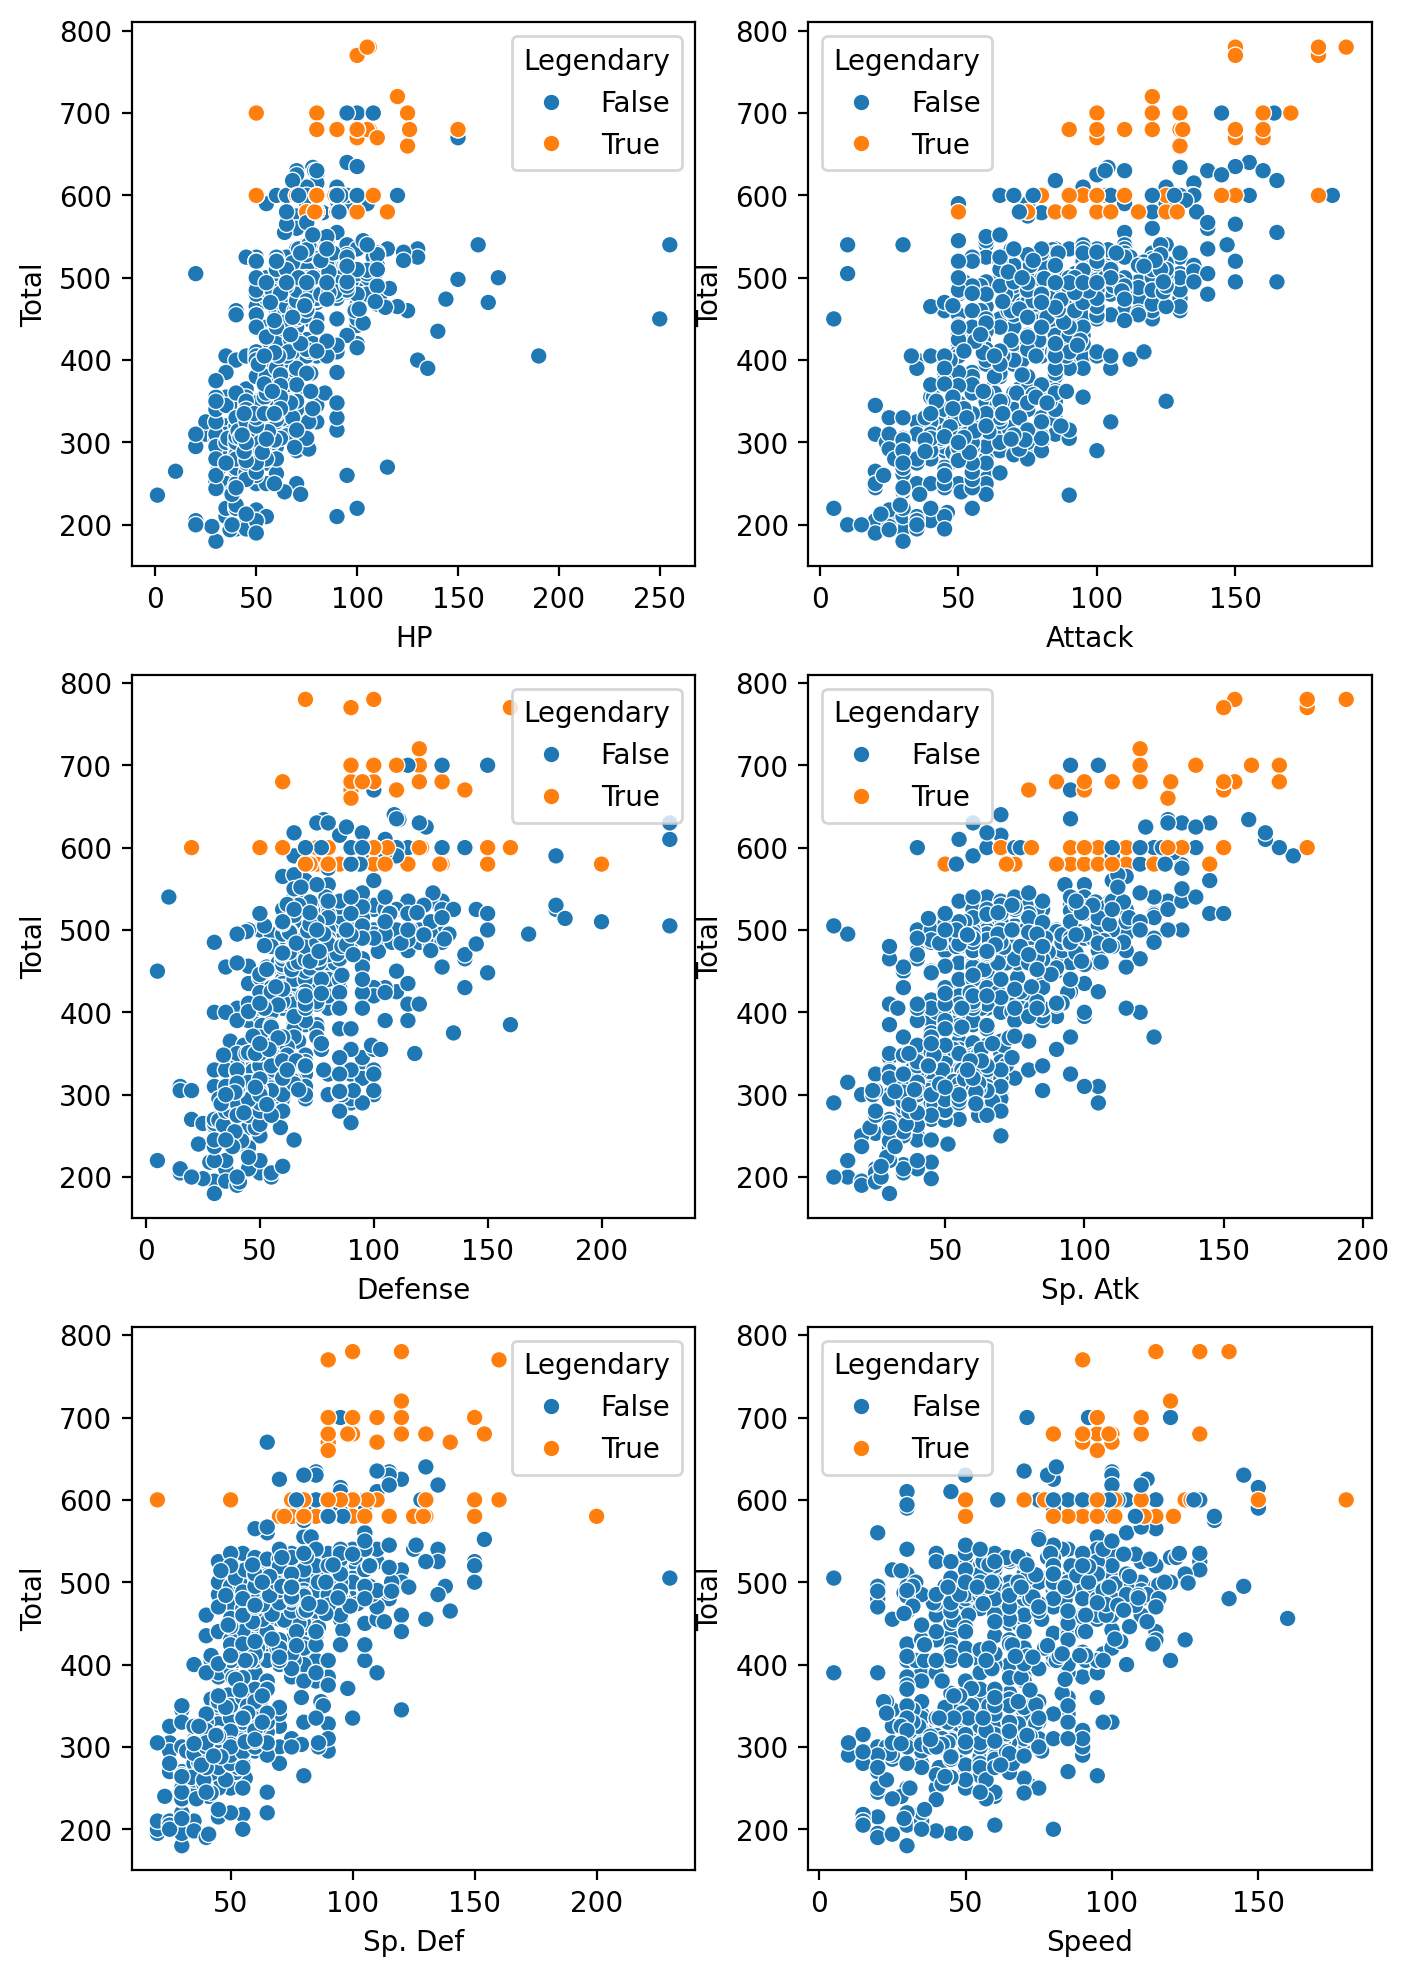

In [30]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(8, 12)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

특정 값들이 전설의 포켓몬보다 높은 경우는 있으나, total 값은 낮은걸로 봐선 해당 항목만 특이적으로 높은 포켓몬임을 알 수 있음.<br>
그리고 전설의 포켓몬은 기본적으로 모든 항목에서 평균 이상인 모습을 보이며 특히 물리공격력(attack)과 특수공격력(Sp.Atk), Speed에서는 제일 높은 값을 가지는 포켓몬이 전설의 포켓몬임을 알 수 있다.



##### 전설의 포켓몬의 Total값

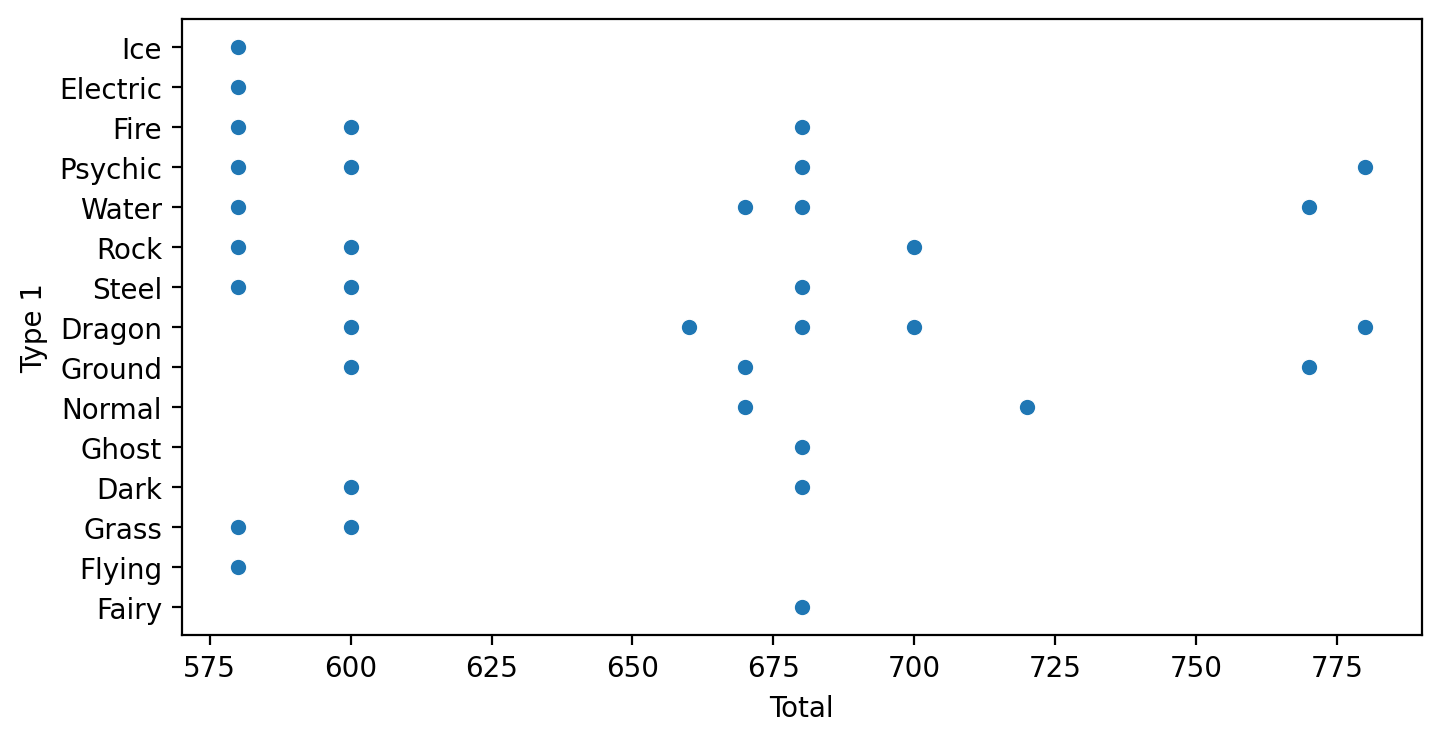

In [31]:
# Total 값을 Type1 별로 확인해보기
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [32]:
len(legendary)

65

In [33]:
# 전설의 포켓몬이 가지는 Total 값을 확인하기
print(sorted(list(set(legendary["Total"]))))
len(list(set(legendary['Total'])))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


9

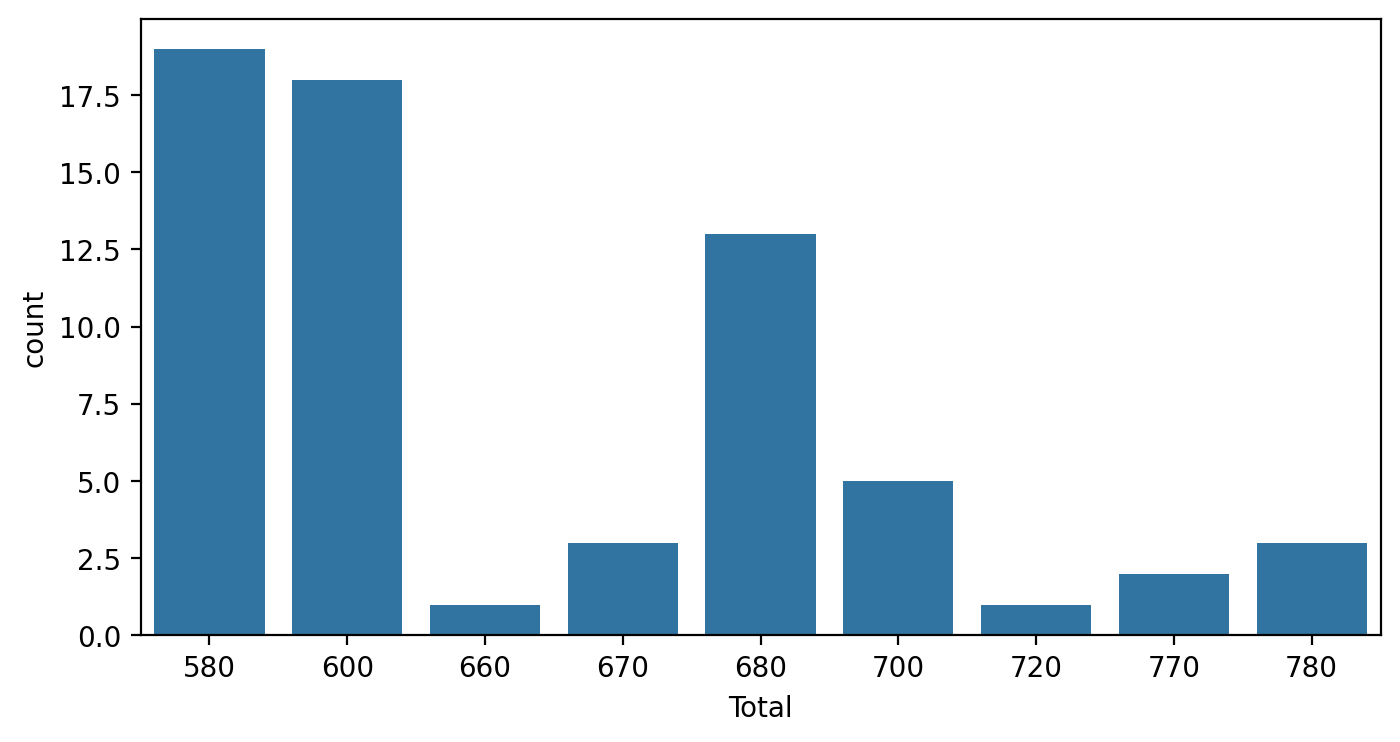

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

전설의 포켓몬은: (65 / 9 = 7.22)마리끼리 같은 Total 스탯값을 가진다(편중되어 있다)<br>
그리고 최솟값 580, 최댓값 780으로 높은 스탯값을 가진다.

##### 일반 포켓몬의 Total값

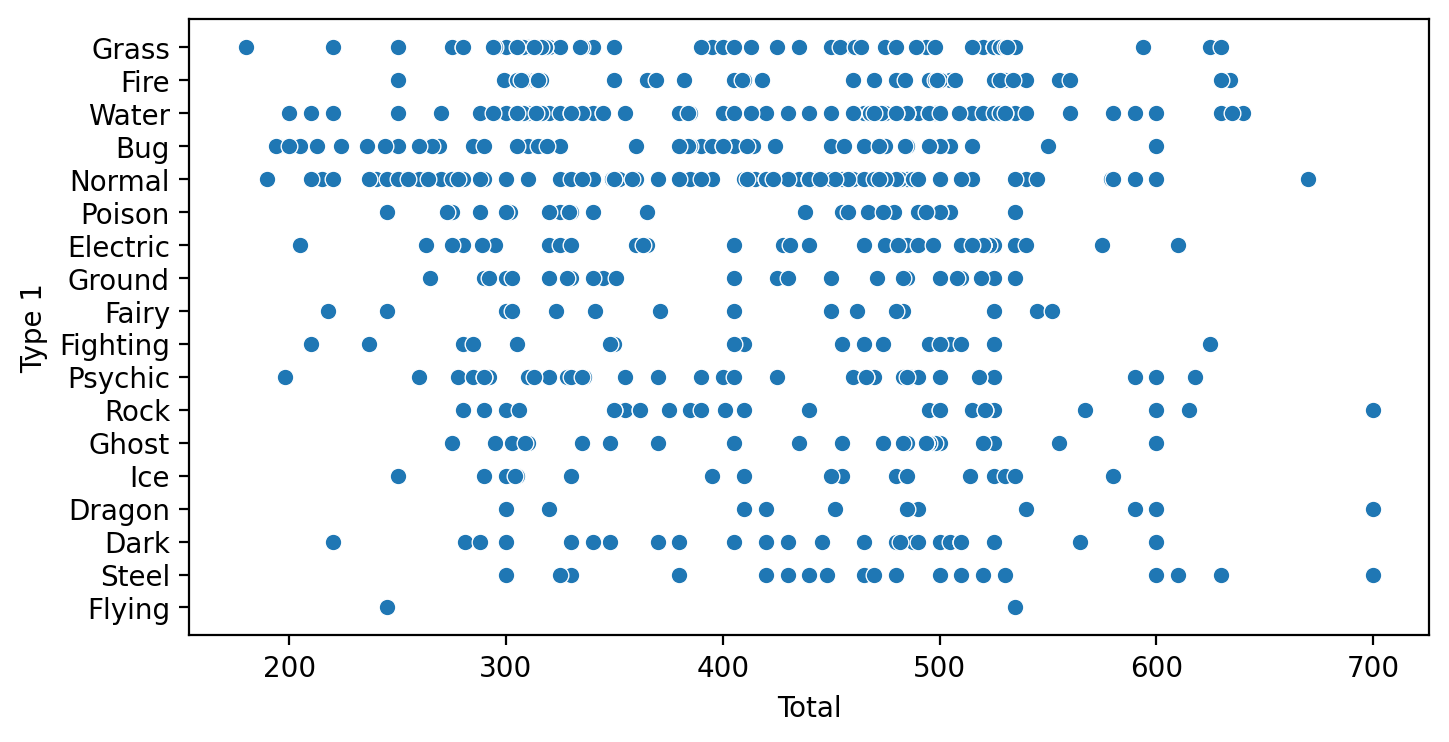

In [35]:
# Total 값을 Type1 별로 확인해보기
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [36]:
len(ordinary)

735

In [37]:
print(sorted(list(set(ordinary["Total"]))))
len(list(set(ordinary['Total'])))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


195

일반 포켓몬은: (735 / 195 = 3.77)마리끼리 같은 Total 스탯값을 가지며<br>
최저 180, 최고 700으로 값이 넓게 분산되어있다.

#### 따라서. 전설의 포켓몬의 Total 값은 편중되어 있기 때문에, 한 포켓몬의 Total 값이 전설의 포켓몬 값들의 집합에 포함되는지 여부가 전설의 포켓몬임을 결정하는데 큰 영향을 미칠것이다.

####또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 (680, 720, 770, 780)과 같은 Total값이 존재한다.

**즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있다.**

#### 'Generation'속성 분석하기

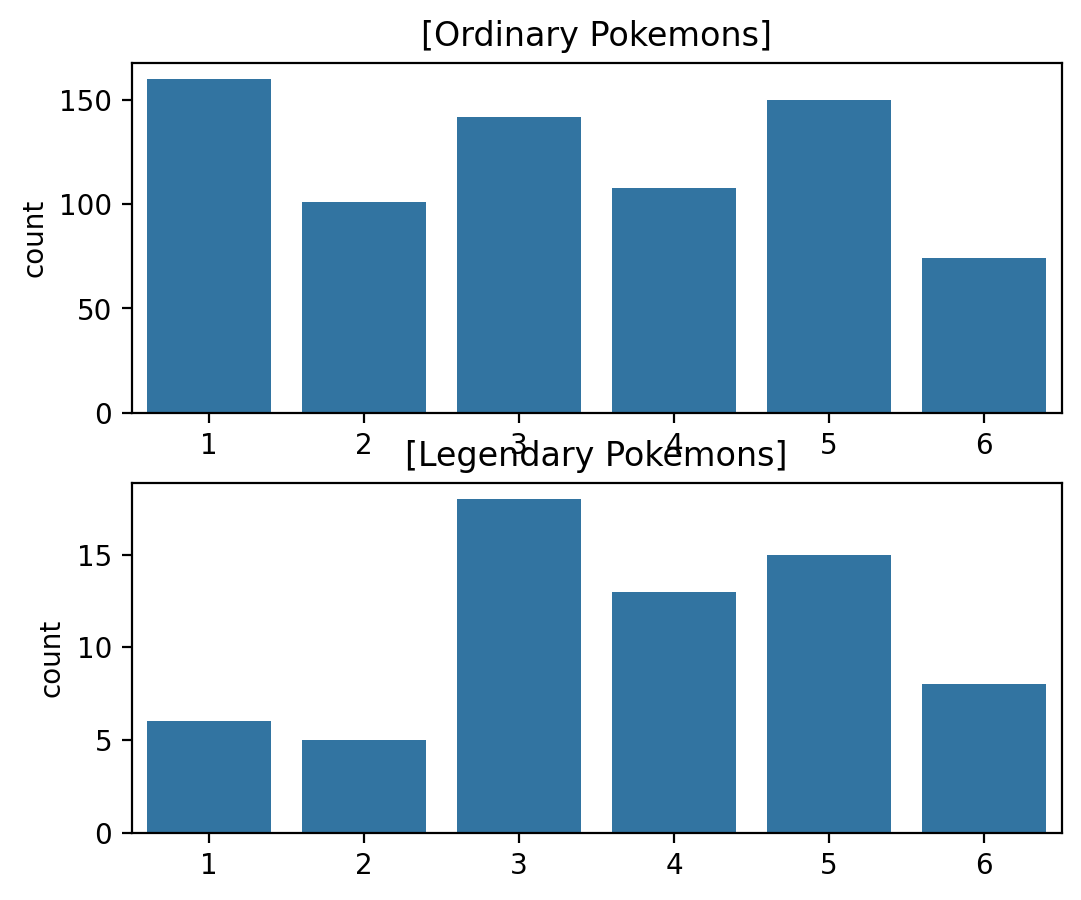

In [38]:
# 각 세대에 대한 포켓몬 수 확인하기
plt.figure(figsize=(6,5))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

#### 3,4,5세대의 포켓몬일 때 전설의 포켓몬일 확룔이 조금 높겠군!

# Step2. 데이터 전처리하기

위에서 분석한 내용들을 바탕으로 데이터를 전처리 해주어 효과적인 모델 학습 시키기   
(1) 이름의 길이가 길 수록 전설의 포켓몬일 가능성이 높겠군!   
(2) 특정 이름을 가지고 있으면 전설의 포켓몬일 가능성이 높겠군!   
(3) 특정 type(1&2)을 가지고 있으면 전설의 포켓몬일 가능성이 높겠군!


### (1) 이름의 길이를 표현하는 항목 생성

name_count 칼럼을 생성 후 길이가 10을 넘는지, 아닌지 bool값을 가지는 long_name 칼럼을 생성

In [39]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i : len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [40]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


### (2) object인 이름을 학습데이터로 쓸 수 있도록 가공하기

포켓몬의 이름은 총 네 가지 타입으로 나뉩니다.

1. 한 단어면 ex. Venusaur   
2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur   
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X      
4. 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme
<br>
**-> 전부 알파벳으로 변경하고, 공란과 대문자를 기준으로 split하여 토큰을 생성해서 전설의 포켓몬의 이름으로 많이 사용되는 이름을 포함하고 있는지 여부를 표시하자**

#### 이름이 전부 알파벳이도록 전처리하기

In [41]:
# isalpha()함수는 띄어쓰기도 false로 처리하기 때문에, 띄어쓰기 없애주기
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander


In [42]:
# name_isalpha 칼럼을 생성하고, 알파벳여부를 bool값으로 입력
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [43]:
# 알파벳이 아닌 항목들 출력하기
print(pokemon[pokemon['name_isalpha'] == False].shape)
pokemon[pokemon['name_isalpha'] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [44]:
# 해당 항목들을 일일이 알파벳 이름으로 변환처리 해주기
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

# 불러와서 확인
pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [45]:
# 바뀐 이름으로 'Name_nospace', 'name_isalpha' 칼럼 업데이트하고 False 항목여부 확인
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i : i.replace(" ",""))
pokemon['name_isalpha'] = pokemon['Name_nospace'].apply(lambda i : i.isalpha())
pokemon[pokemon["name_isalpha"] == False]  # 값이 출력되지 않는것 확인

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


#### 이름에서 토큰 추출

In [46]:
import re

In [47]:
# 공백을 없애고, 대문자를 기준으로 나누어 토큰화 하는 함수 생성
def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [48]:
# 전설의 포켓몬의 이름을 기준으로 tokenize 함수 적용하여 token set 리스트 생성하기
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [49]:
import collections
from collections import Counter

In [50]:
# 전설의 포켓몬 이름에 많이 포함되어 있는 단어 뽑아내기
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [51]:
# 전체 pokemon을 대상으로 most_common의 항목을 가지고 있는지 여부에 대한 칼럼 생성
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [52]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   #             800 non-null    int64 
 1   Name          800 non-null    object
 2   Type 1        800 non-null    object
 3   Type 2        414 non-null    object
 4   Total         800 non-null    int64 
 5   HP            800 non-null    int64 
 6   Attack        800 non-null    int64 
 7   Defense       800 non-null    int64 
 8   Sp. Atk       800 non-null    int64 
 9   Sp. Def       800 non-null    int64 
 10  Speed         800 non-null    int64 
 11  Generation    800 non-null    int64 
 12  Legendary     800 non-null    bool  
 13  name_count    800 non-null    int64 
 14  long_name     800 non-null    bool  
 15  Name_nospace  800 non-null    object
 16  name_isalpha  800 non-null    bool  
 17  Forme         800 non-null    bool  
 18  Mega          800 non-null    bool  
 19  Mewtwo  

### (3) type 1 & 2, 범주형 데이터 전처리하기

In [53]:
print(types)

['Normal', 'Steel', 'Fairy', 'Poison', 'Ghost', 'Rock', 'Ground', 'Electric', 'Bug', 'Grass', 'Fighting', 'Psychic', 'Dragon', 'Water', 'Flying', 'Dark', 'Ice', 'Fire']


In [54]:
# type별로 칼럼을 생성하여 one-hot encoding 시행하기
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)  #|는 or이라는 뜻

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Normal,Steel,Fairy,Poison,Ghost,Rock,Ground,Electric,Bug,Grass,Fighting,Psychic,Dragon,Water,Flying,Dark,Ice,Fire
0,Grass,Poison,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [55]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Normal', 'Steel', 'Fairy', 'Poison', 'Ghost', 'Rock', 'Ground',
       'Electric', 'Bug', 'Grass', 'Fighting', 'Psychic', 'Dragon', 'Water',
       'Flying', 'Dark', 'Ice', 'Fire'],
      dtype='object')

In [56]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   #             800 non-null    int64 
 1   Name          800 non-null    object
 2   Type 1        800 non-null    object
 3   Type 2        414 non-null    object
 4   Total         800 non-null    int64 
 5   HP            800 non-null    int64 
 6   Attack        800 non-null    int64 
 7   Defense       800 non-null    int64 
 8   Sp. Atk       800 non-null    int64 
 9   Sp. Def       800 non-null    int64 
 10  Speed         800 non-null    int64 
 11  Generation    800 non-null    int64 
 12  Legendary     800 non-null    bool  
 13  name_count    800 non-null    int64 
 14  long_name     800 non-null    bool  
 15  Name_nospace  800 non-null    object
 16  name_isalpha  800 non-null    bool  
 17  Forme         800 non-null    bool  
 18  Mega          800 non-null    bool  
 19  Mewtwo  

# Step3 : 모델 학습시키기

### 기본 데이터로 베이스라인 모델 만들기

성능 하한선을 제공함으로써 만들 모델이 맞는 방향으로 가고 있는지 확인할 수 있음

##### 의미없는 칼럼(#), 문자열데이터(Name, Type1, Type2), 타겟 데이터(Legendary)는 빼고 입력데이터 생성하기

In [57]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [58]:
# 타겟데이터 설정하기
target = 'Legendary'

y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

##### 훈련데이터, 학습데이터 분리하기

train_test_split()을 사용해서 훈련데이터, 학습데이터를 분리해줄 수 있다.
- test size : train data 와 test data의 비율을 조정할 수 있다
- random_state : 임의의 정수를 입력하면 항상 똑같은 세팅으로 data를 분리함. 만약에 사용하지 않는다면, 매번 다른 조합의 data 조합이 생기므로 필수적으로 적용해야함<br>

*사용할 수 있는 정수범위 : 32비트 시스템: -2,147,483,648부터 2,147,483,647까지의 범위.
64비트 시스템: -9,223,372,036,854,775,808부터 9,223,372,036,854,775,807까지의 범위.*

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


#### DecisionTree 사용하여 모델생성

In [60]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [61]:
# 여기서도 똑같이 random_state를 사용해주어 모델의 랜덤성을 제어함
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [62]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


#### 모델의 성능 판단하기

**confusion matrix**


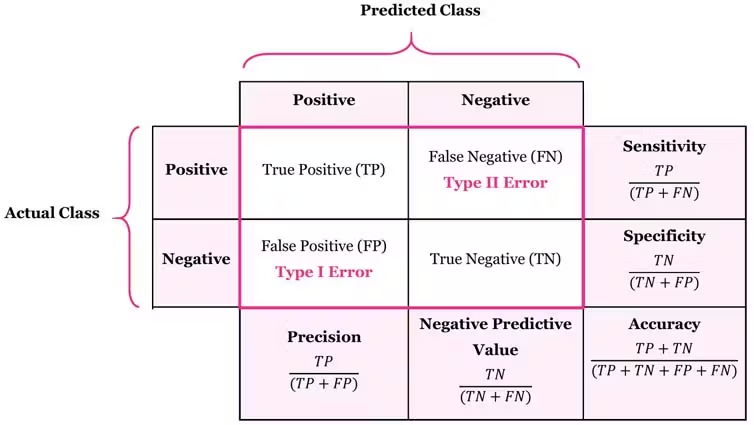

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

array([[144,   3],   =   [[TN,FP]     
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[  5,   8]])&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[FN,TP]]
<br><br>
TN(True Negative) = 144; 일반 포켓몬을 전설의 포켓몬이 아니라고 옳게 판단   
FP(False Positive) = 3; 일반 포켓몬을 전설의 포켓몬이라고 판단   
FN(False Negative) = 5; 전설의 포켓몬을 일반 포켓몬으로 판단   
TP(True Positive) = 144 ; 전설의 포켓몬을 전설의 포켓몬이라고 옳게 판단

정확도 = (TP+TN) / (TP+TN+FP+FN)<br>
즉, 152 / 160 * 100 = 95%이다.   
그러나 전체 800마리중 735마리는 일반 포켓몬이었으므로 한 값으로만 찍어도 기본 735 / 800 * 100 = 92%의 정확도는 달성할 수 있다.   
따라서, 여기서는 정확도를 평가도구로 사용하는것은 의미가 없다.

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



recall = TP / (FN+TP)   
즉, recall 값이 낮다는건 FN값(전설의 포켓몬을 일반 포켓몬으로 판단)이 높다는것.   

###### Dicitiontree, 기본데이터 : accuracy 0.95, recall 0.62

### 전처리한 데이터로 모델 생성하기

##### 입력, 학습 데이터 생성하기

In [65]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Normal', 'Steel', 'Fairy', 'Poison', 'Ghost', 'Rock', 'Ground',
       'Electric', 'Bug', 'Grass', 'Fighting', 'Psychic', 'Dragon', 'Water',
       'Flying', 'Dark', 'Ice', 'Fire'],
      dtype='object')


다음중, #, Name, Type1, Type2, Name_nospace,
name_isalpha 는 학습데이터로 필요없음.   
그리고 Legendary 는 target 데이터로 생성해야함.

In [66]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

In [67]:
# 입력데이터 생성
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [68]:
# target data 생성
y = pokemon['Legendary']
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [69]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


##### Decision tree model 학습시키기

In [70]:
model = DecisionTreeClassifier(random_state=25)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##### 학습된 모델 평가하기

In [71]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



###### Decision tree, 전처리데이터 : accuracy 0.96, recall 0.92

# 추가시도 : 이진분류(sigmoid) 적용해보기

### 기본데이터로 적용하기

##### 학습 데이터 세팅

In [73]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
xo = original_data[features]

target = 'Legendary'
yo = original_data[target]

from sklearn.model_selection import train_test_split
xo_train, xo_test, yo_train, yo_test = train_test_split(xo, yo, test_size=0.2, random_state=15)


##### 모델세팅

In [74]:
# model = keras.Sequential([
#     layers.Dense(16, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])
# model.compile(optimizer="rmsprop",
#               loss="binary_crossentropy",
#               metrics=["accuracy"])

# history_o = model.fit(xo_train,
#                     yo_train,
#                     epochs=50,
#                     batch_size=64,
#                     validation_split=0.2)

In [75]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [76]:
def create_model():
    model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
    return model

**ModelCheckpoint 콜백**은 새로운 검증 정확도나 손실에 도달하는 것과 같이 진행이 되면 구조와 함께 모델의 가중치를 저장합니다.

ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)   
<br>
monitor: 모니터링할 대상(주로 **val_loss**)   
save_best_only: TRUE인 경우 모니터링된 수량에 따라 최상의 모델만 저장합니다.   
Save_weights_only: TRUE인 경우 모델의 가중치만 저장됩니다.   
mode: {auto, min, max} 중 하나. 최소 모드에서 모니터링되는 양이 감소를 멈추면 훈련이 중지됩니다. 최대 모드에서는 모니터링되는 양이 증가하는 것을 멈췄을 때 멈춥니다. 자동 모드에서는 모니터링되는 수량의 이름에서 방향이 자동으로 유추됩니다.

**EarlyStopping**(monitor=**'val_loss'**, min_delta=0, patience=0, mode='auto')

min_delta: 개선으로 인정받기 위한 모니터링 수량의 최소 변화
patience: 개선 없이 모니터링된 수량을 생성한 에포크 수 이후 학습이 중지됩니다.

In [77]:
model = create_model()

checkpoint_path = "training_o/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 확실하게 하기 위해서 early_stoppingm modelcheckpoint 적용
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001, verbose = 1),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose =1)
]

history_o = model.fit(xo_train,
                    yo_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=keras_callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 8s - loss: 13.9653 - accuracy: 0.0469
Epoch 1: val_loss improved from inf to 0.78584, saving model to training_o/cp.ckpt
8/8 [==============================] - 3s 273ms/step - loss: 3.4461 - accuracy: 0.5957 - val_loss: 0.7858 - val_accuracy: 0.8516
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.9477 - accuracy: 0.8750
Epoch 2: val_loss improved from 0.78584 to 0.72745, saving model to training_o/cp.ckpt
8/8 [==============================] - 1s 108ms/step - loss: 1.2440 - accuracy: 0.8164 - val_loss: 0.7275 - val_accuracy: 0.8594
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 1.0109 - accuracy: 0.8438
Epoch 3: val_loss improved from 0.72745 to 0.70015, saving model to training_o/cp.ckpt
8/8 [==============================] - 1s 80ms/step - loss: 1.1108 - accuracy: 0.8242 - val_loss: 0.7001 - val_accuracy: 0.8359
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 1.5408 - accur

epoch 14이후 과적합되었다고 판단함.

##### 모델 평가하기 : loss, accuracy 그래프 그려보기

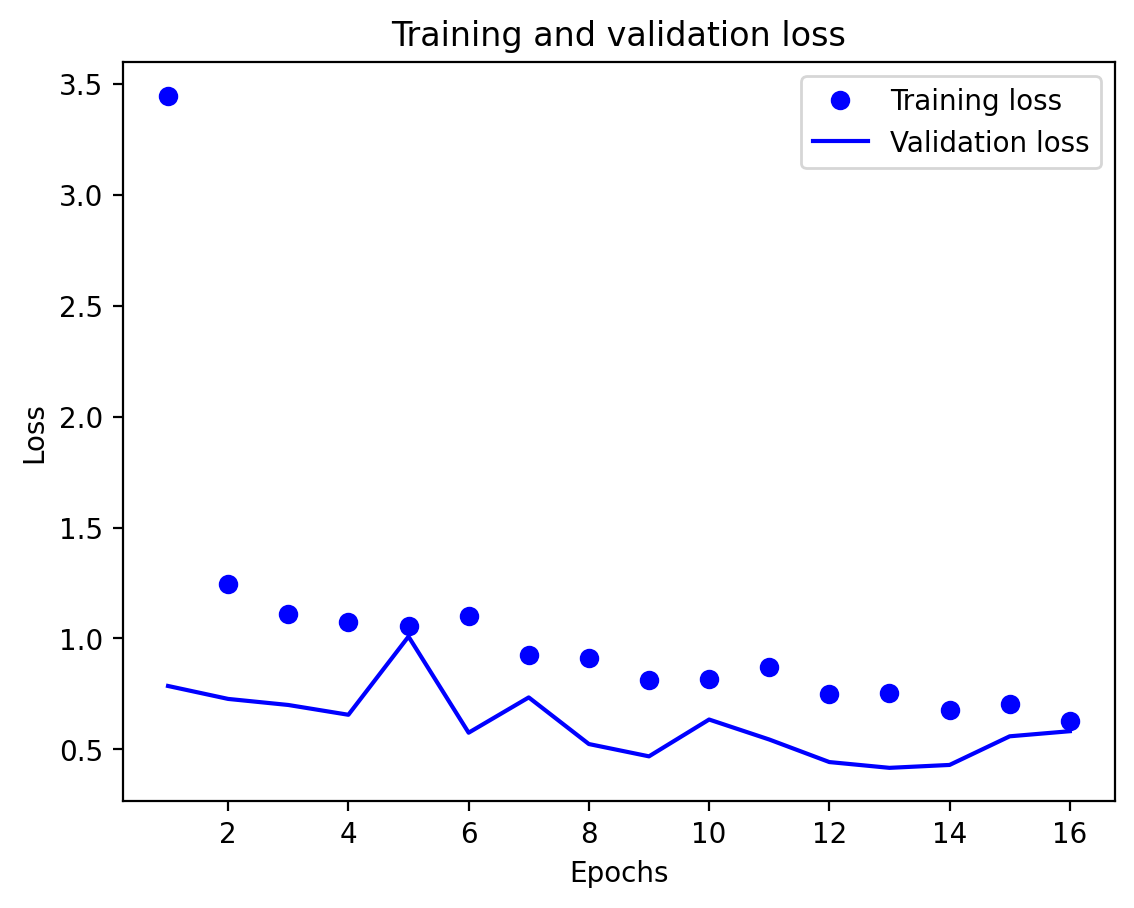

In [78]:
import matplotlib.pyplot as plt
history_o_dict = history_o.history
loss_values_o = history_o_dict["loss"]
val_loss_values_o = history_o_dict["val_loss"]
epochs = range(1, len(loss_values_o) + 1)
plt.plot(epochs, loss_values_o, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_o, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

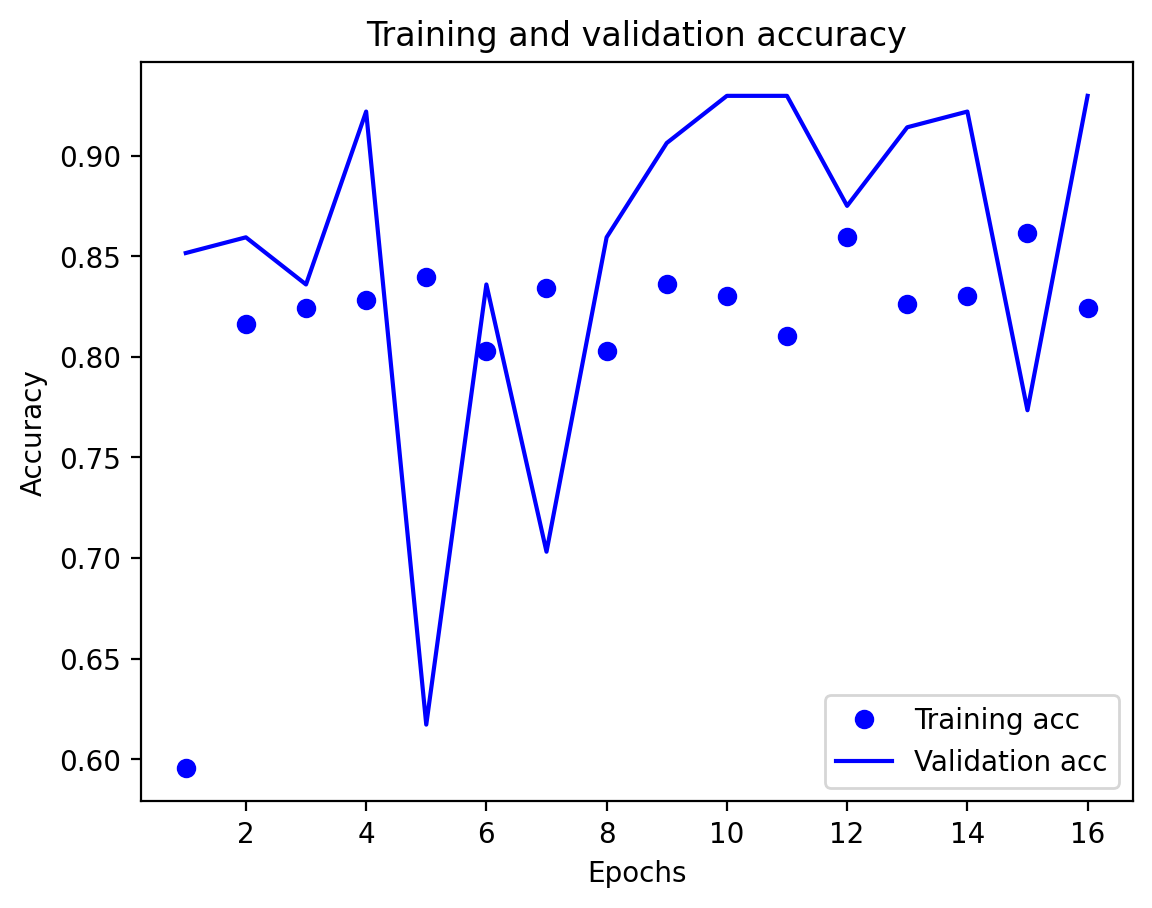

In [79]:
plt.clf()
acc_o = history_o_dict["accuracy"]
val_acc_o = history_o_dict["val_accuracy"]
plt.plot(epochs, acc_o, "bo", label="Training acc")
plt.plot(epochs, val_acc_o, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### 모델 다시 세팅 후 test data로 검증하기

In [80]:
# model = keras.Sequential([
#     layers.Dense(16, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])
# model.compile(optimizer="rmsprop",
#               loss="binary_crossentropy",
#               metrics=["accuracy"])
# history = model.fit(xo_train,
#                     yo_train,
#                     epochs=39,
#                     batch_size=64,
#                     validation_split=0.2)
# results = model.evaluate(xo_test, yo_test)

14번째 epoch의 값이 저장되어 있음.

In [81]:
os.listdir(checkpoint_dir)

['cp.ckpt']

In [82]:
model = create_model()
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(xo_test, yo_test, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

5/5 [==============================] - 0s 5ms/step - loss: 0.5511 - accuracy: 0.9125
Restored model, accuracy: 91.25%


###### original 데이터 Denselayer : 91.25%의 정확도

### 전처리한 데이터로 적용하기

##### 학습데이터 세팅

features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

X = pokemon[features]

y = pokemon['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

학습데이터 구성을 decision tree때와 동일하게 만들었더니,  
  ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).
에러가 계속 나서 Gemini의 도움을 받아 해결했다.

In [83]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

xf = pokemon[features]
yf = pokemon['Legendary']

In [84]:
# 무엇이 문제인가 싶어 데이터를 불러와봄
pd.set_option('display.max_columns', None)  # column 38개를 생략없이 출력하기 위해 추가

row_1 = xf.iloc[0]
print(row_1)

Total           318
HP               45
Attack           49
Defense          49
Sp. Atk          65
Sp. Def          65
Speed            45
Generation        1
name_count        9
long_name     False
Forme         False
Mega          False
Mewtwo        False
Deoxys        False
Kyurem        False
Latias        False
Latios        False
Kyogre        False
Groudon       False
Hoopa         False
Poison         True
Ground        False
Flying        False
Normal        False
Water         False
Fire          False
Electric      False
Rock          False
Dark          False
Fairy         False
Steel         False
Ghost         False
Psychic       False
Ice           False
Bug           False
Grass          True
Dragon        False
Fighting      False
Name: 0, dtype: object


In [85]:
xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   name_count  800 non-null    int64
 9   long_name   800 non-null    bool 
 10  Forme       800 non-null    bool 
 11  Mega        800 non-null    bool 
 12  Mewtwo      800 non-null    bool 
 13  Deoxys      800 non-null    bool 
 14  Kyurem      800 non-null    bool 
 15  Latias      800 non-null    bool 
 16  Latios      800 non-null    bool 
 17  Kyogre      800 non-null    bool 
 18  Groudon     800 non-null    bool 
 19  Hoopa       800 non-null    bool 
 20  Poison      800 non-null    bool

In [86]:
xf_train, xf_test, yf_train, yf_test = train_test_split(xf, yf, test_size=0.2, random_state=15)
xf_train = xf_train.select_dtypes(include=['int64']).values  # Gemini의 도움으로 수정함.
xf_test = xf_test.select_dtypes(include=['int64']).values

`.select_dtypes(include=['uint8', 'int64', 'float64'])`   
: This selects only columns with numerical data types (integers and floats), which are suitable for the model.   
: Boolean은 수정할것 없이 자동으로 숫자변환됨

##### 모델 학습시키기

In [87]:
# model = keras.Sequential([
#     layers.Dense(16, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])
# model.compile(optimizer="rmsprop",
#               loss="binary_crossentropy",
#               metrics=["accuracy"])

# history_f = model.fit(xf_train,
#                     yf_train,
#                     epochs=50,
#                     batch_size=64,
#                     validation_split=0.2)

In [88]:
model = create_model()

checkpoint_path = "training_f/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001, verbose = 1),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose =1)
]

history_f = model.fit(xf_train,
                    yf_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=keras_callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 5s - loss: 0.8570 - accuracy: 0.9219
Epoch 1: val_loss improved from inf to 0.58796, saving model to training_f/cp.ckpt
8/8 [==============================] - 2s 152ms/step - loss: 1.0982 - accuracy: 0.8027 - val_loss: 0.5880 - val_accuracy: 0.8047
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4971 - accuracy: 0.8281
Epoch 2: val_loss improved from 0.58796 to 0.48532, saving model to training_f/cp.ckpt
8/8 [==============================] - 1s 118ms/step - loss: 0.8744 - accuracy: 0.8145 - val_loss: 0.4853 - val_accuracy: 0.9062
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4544 - accuracy: 0.8906
Epoch 3: val_loss did not improve from 0.48532
8/8 [==============================] - 0s 11ms/step - loss: 0.6792 - accuracy: 0.8359 - val_loss: 0.4967 - val_accuracy: 0.8281
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.7211 - accuracy: 0.7656
Epoch 4: val_loss improved fr

epoch 15의 정보를 저장함

##### 모델 평가하기

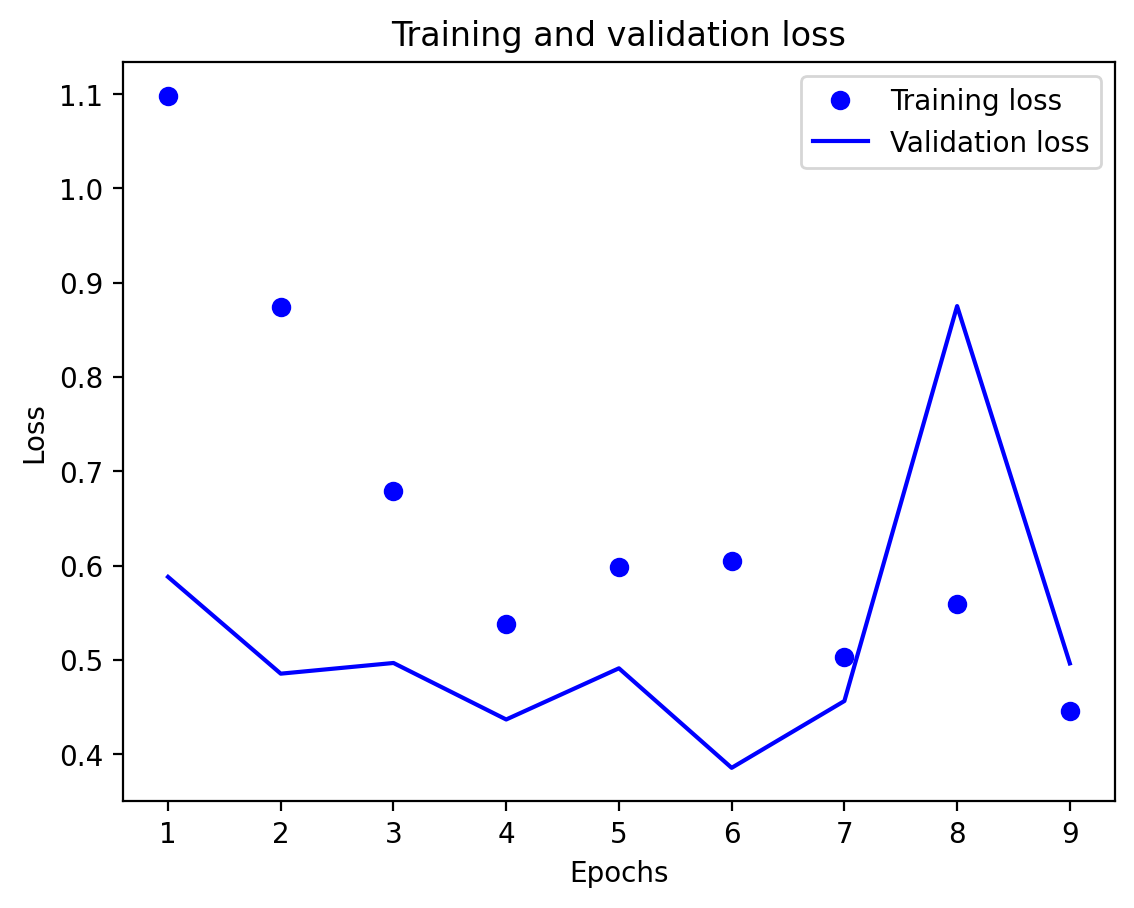

In [89]:
history_dict_f = history_f.history
loss_values_f = history_dict_f["loss"]
val_loss_values_f = history_dict_f["val_loss"]
epochs = range(1, len(loss_values_f) + 1)
plt.plot(epochs, loss_values_f, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_f, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

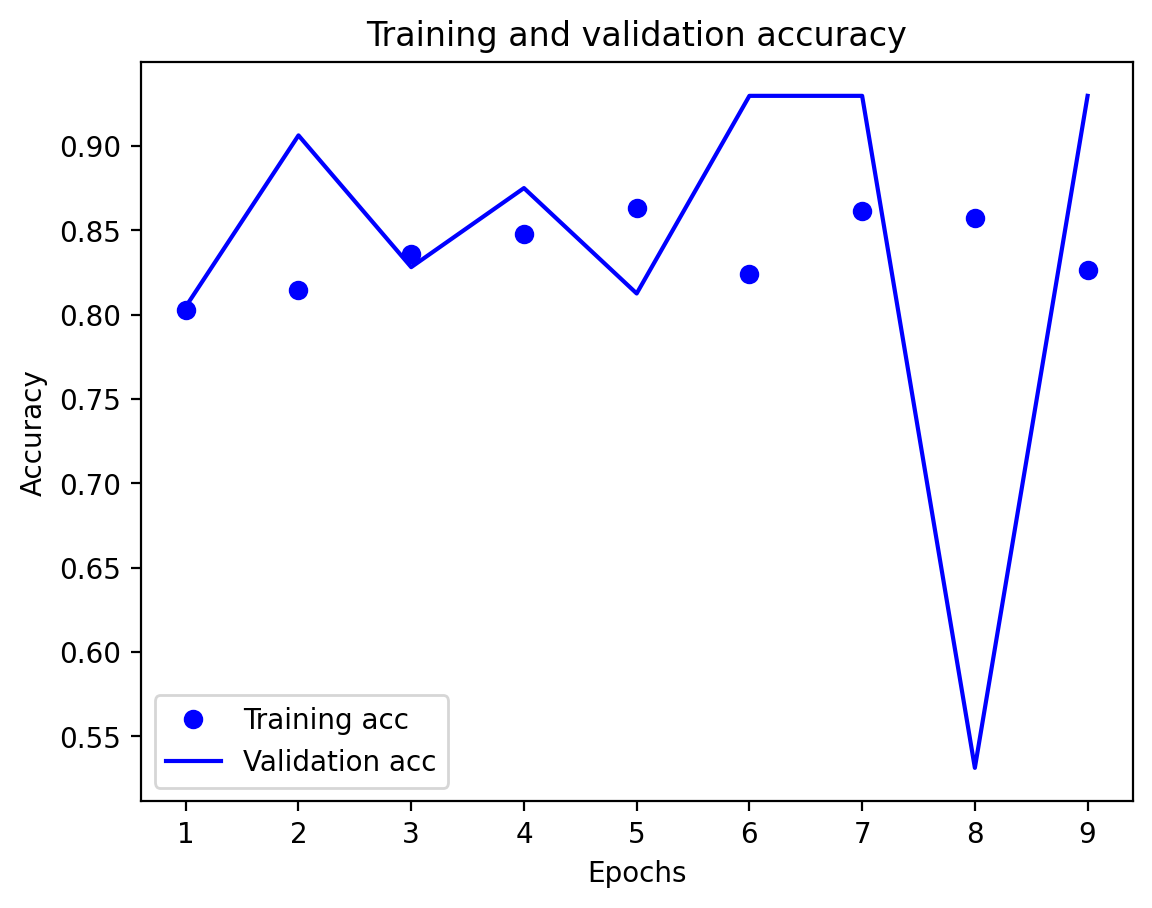

In [90]:
plt.clf()
acc_f = history_dict_f["accuracy"]
val_acc_f = history_dict_f["val_accuracy"]
plt.plot(epochs, acc_f, "bo", label="Training acc")
plt.plot(epochs, val_acc_f, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### 모델 다시 세팅 후 test data로 검증하기

In [91]:
model = create_model()
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(xf_test, yf_test, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

5/5 [==============================] - 0s 5ms/step - loss: 0.4761 - accuracy: 0.9125
Restored model, accuracy: 91.25%


###### 전처리데이터 Denselayer : 91.25%의 정확도

# 추가시도2 : 데이터 정규화처리해보기

In [92]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

pokemon_f = pokemon[features]

In [93]:
pd.set_option('display.max_columns', None)  # column 38개를 생략없이 출력하기 위해 추가

pokemon_f.head(2)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,Forme,Mega,Mewtwo,Deoxys,Kyurem,Latias,Latios,Kyogre,Groudon,Hoopa,Poison,Ground,Flying,Normal,Water,Fire,Electric,Rock,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


데이터들이 다 너무 값이 커서 scaling을 해보자
1. 0~1사이의 값으로 제한하는 min-max normalization
2. 평균0, 분산 1의 standard scaling
3. Q1,Q2,Q3의 값을 사용하는 robust scaling



In [94]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

mm = MinMaxScaler()
rs = RobustScaler()
ss = StandardScaler()

### MinMaxScaler

In [95]:
pokemon_mm = mm.fit_transform(pokemon_f)
xm = pd.DataFrame(pokemon_mm, columns=features)
xm.head(2)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,Forme,Mega,Mewtwo,Deoxys,Kyurem,Latias,Latios,Kyogre,Groudon,Hoopa,Poison,Ground,Flying,Normal,Water,Fire,Electric,Rock,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,0.230,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.375,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [96]:
ym = pokemon['Legendary']
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.2, random_state=15)

#### 모델학습

In [97]:
model = create_model()

checkpoint_path = "training_mm/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001, verbose = 1),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose =1)
]

history_f = model.fit(xm_train,
                    ym_train,
                    epochs=300,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=keras_callbacks)

Epoch 1/300
1/8 [==>...........................] - ETA: 4s - loss: 0.7483 - accuracy: 0.2188
Epoch 1: val_loss improved from inf to 0.62543, saving model to training_mm/cp.ckpt
8/8 [==============================] - 1s 111ms/step - loss: 0.6776 - accuracy: 0.6035 - val_loss: 0.6254 - val_accuracy: 0.8438
Epoch 2/300
1/8 [==>...........................] - ETA: 0s - loss: 0.6434 - accuracy: 0.7500
Epoch 2: val_loss improved from 0.62543 to 0.57004, saving model to training_mm/cp.ckpt
8/8 [==============================] - 1s 84ms/step - loss: 0.6129 - accuracy: 0.8398 - val_loss: 0.5700 - val_accuracy: 0.9062
Epoch 3/300
1/8 [==>...........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.9062
Epoch 3: val_loss improved from 0.57004 to 0.52268, saving model to training_mm/cp.ckpt
8/8 [==============================] - 1s 79ms/step - loss: 0.5669 - accuracy: 0.9043 - val_loss: 0.5227 - val_accuracy: 0.9375
Epoch 4/300
1/8 [==>...........................] - ETA: 0s - loss: 0.5556 - 

8/8 [==============================] - 1s 156ms/step - loss: 0.3597 - accuracy: 0.9141 - val_loss: 0.3039 - val_accuracy: 0.9375
Epoch 11/300
1/8 [==>...........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.8906
Epoch 11: val_loss improved from 0.30394 to 0.29144, saving model to training_mm/cp.ckpt
8/8 [==============================] - 1s 96ms/step - loss: 0.3477 - accuracy: 0.9141 - val_loss: 0.2914 - val_accuracy: 0.9375
Epoch 12/300
1/8 [==>...........................] - ETA: 0s - loss: 0.2963 - accuracy: 0.9219
Epoch 12: val_loss improved from 0.29144 to 0.28232, saving model to training_mm/cp.ckpt
8/8 [==============================] - 1s 116ms/step - loss: 0.3377 - accuracy: 0.9141 - val_loss: 0.2823 - val_accuracy: 0.9375
Epoch 13/300
1/8 [==>...........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.9375
Epoch 13: val_loss improved from 0.28232 to 0.27497, saving model to training_mm/cp.ckpt
8/8 [==============================] - 1s 123ms/step - loss: 0.32

In [98]:
model = create_model()
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(xm_test, ym_test, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

5/5 [==============================] - 2s 7ms/step - loss: 0.1203 - accuracy: 0.9500
Restored model, accuracy: 95.00%


###### MinMax : 95%의 정확도

#### 아까워서 남겨놓는 기존시도들

##### epoch 40

In [99]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(xm_train,
                    ym_train,
                    epochs=40,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 3s 118ms/step - loss: 0.7013 - accuracy: 0.4844 - val_loss: 0.6557 - val_accuracy: 0.7578
Epoch 2/40
8/8 [==============================] - 0s 29ms/step - loss: 0.6442 - accuracy: 0.8203 - val_loss: 0.6086 - val_accuracy: 0.8984
Epoch 3/40
8/8 [==============================] - 0s 19ms/step - loss: 0.6044 - accuracy: 0.8887 - val_loss: 0.5664 - val_accuracy: 0.9375
Epoch 4/40
8/8 [==============================] - 0s 17ms/step - loss: 0.5683 - accuracy: 0.9082 - val_loss: 0.5265 - val_accuracy: 0.9375
Epoch 5/40
8/8 [==============================] - 0s 12ms/step - loss: 0.5334 - accuracy: 0.9141 - val_loss: 0.4872 - val_accuracy: 0.9375
Epoch 6/40
8/8 [==============================] - 0s 10ms/step - loss: 0.4992 - accuracy: 0.9141 - val_loss: 0.4490 - val_accuracy: 0.9375
Epoch 7/40
8/8 [==============================] - 0s 10ms/step - loss: 0.4680 - accuracy: 0.9141 - val_loss: 0.4150 - val_accuracy: 0.9375
Epoch 8/40
8/8 [==========

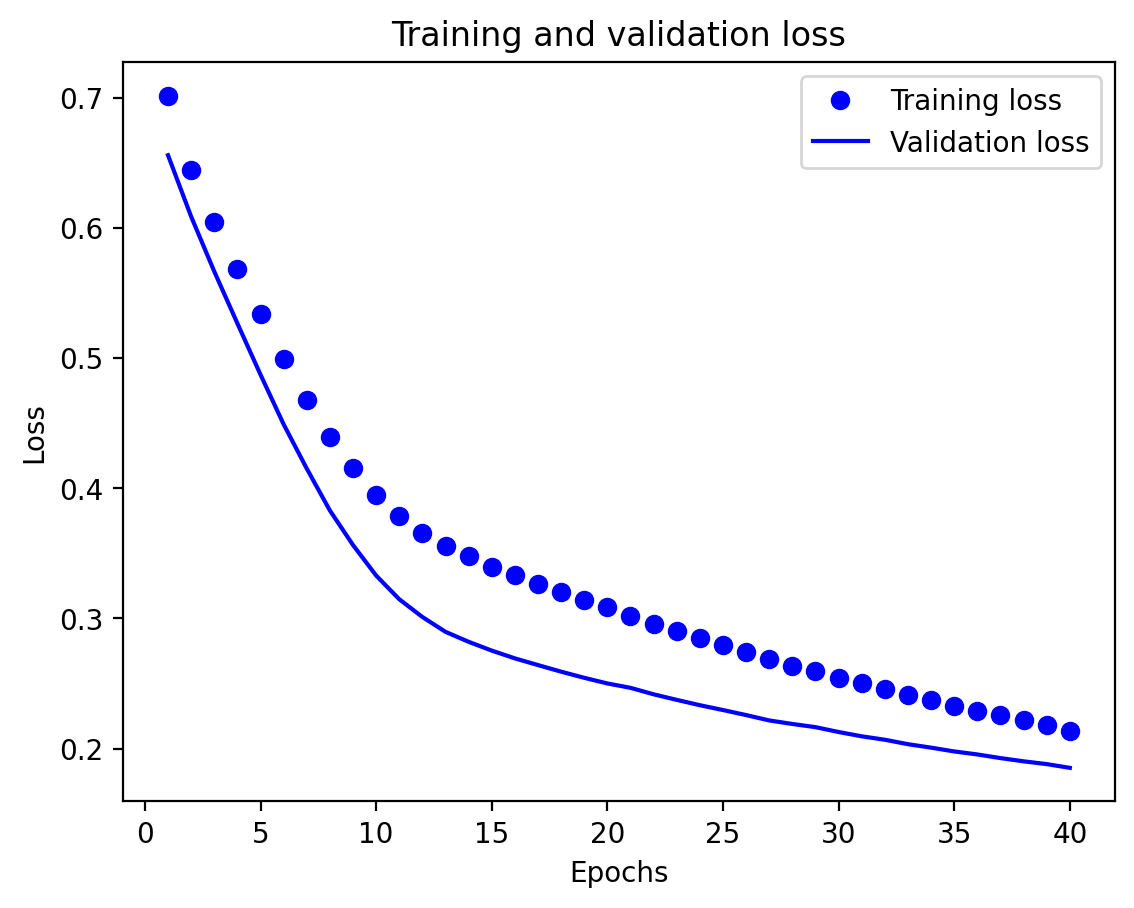

In [100]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

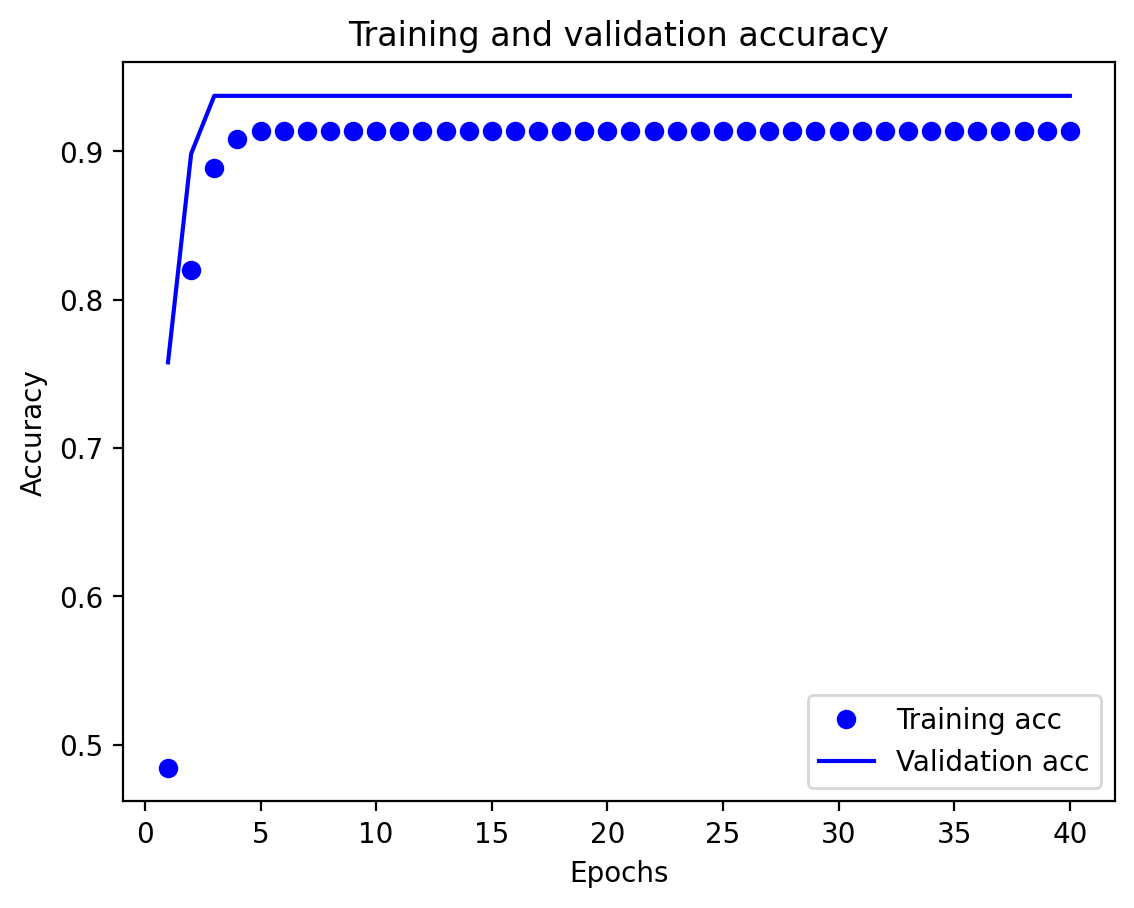

In [101]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### epoch 80

In [102]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(xm_train,
                    ym_train,
                    epochs=80,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/80
8/8 [==============================] - 1s 36ms/step - loss: 0.6720 - accuracy: 0.6543 - val_loss: 0.6248 - val_accuracy: 0.8203
Epoch 2/80
8/8 [==============================] - 0s 7ms/step - loss: 0.6076 - accuracy: 0.8516 - val_loss: 0.5692 - val_accuracy: 0.9141
Epoch 3/80
8/8 [==============================] - 0s 8ms/step - loss: 0.5600 - accuracy: 0.9043 - val_loss: 0.5187 - val_accuracy: 0.9375
Epoch 4/80
8/8 [==============================] - 0s 8ms/step - loss: 0.5170 - accuracy: 0.9141 - val_loss: 0.4720 - val_accuracy: 0.9375
Epoch 5/80
8/8 [==============================] - 0s 6ms/step - loss: 0.4786 - accuracy: 0.9141 - val_loss: 0.4296 - val_accuracy: 0.9375
Epoch 6/80
8/8 [==============================] - 0s 6ms/step - loss: 0.4437 - accuracy: 0.9141 - val_loss: 0.3924 - val_accuracy: 0.9375
Epoch 7/80
8/8 [==============================] - 0s 9ms/step - loss: 0.4134 - accuracy: 0.9141 - val_loss: 0.3606 - val_accuracy: 0.9375
Epoch 8/80
8/8 [=================

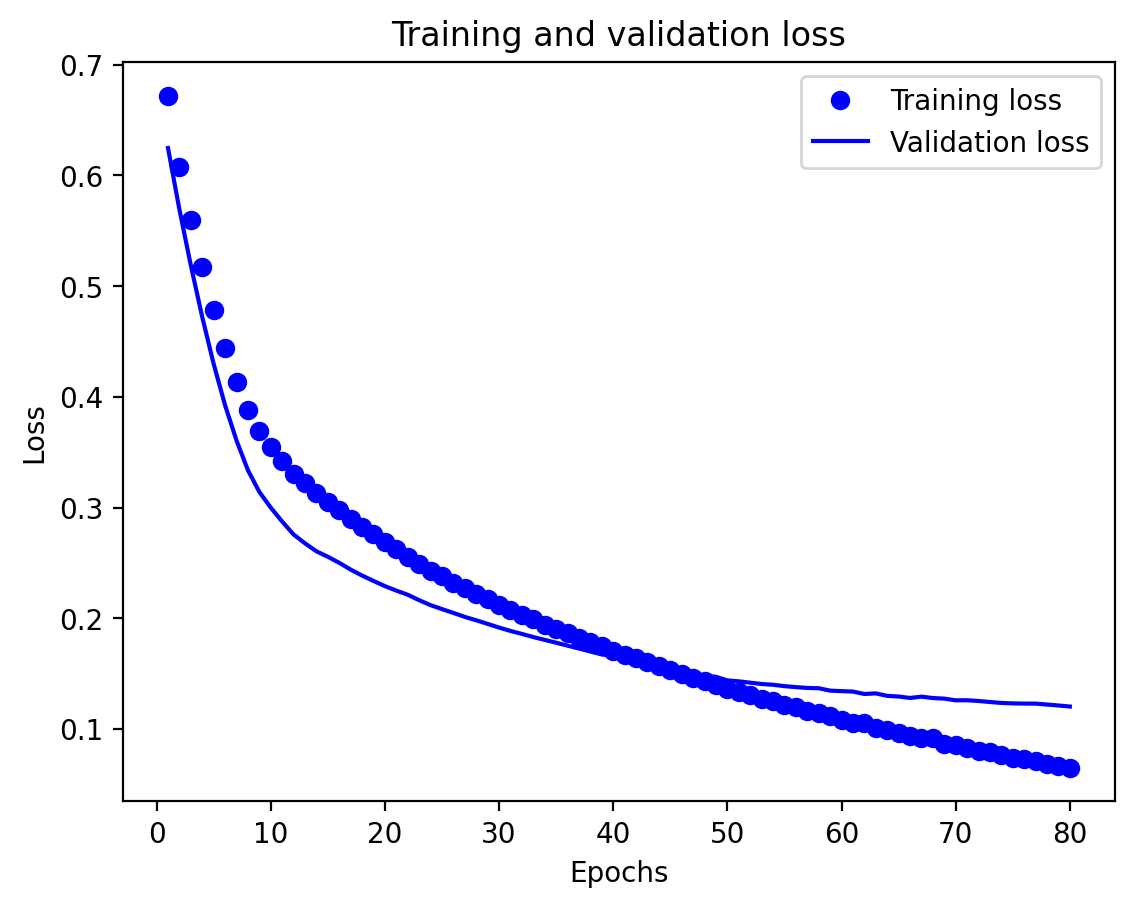

In [103]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

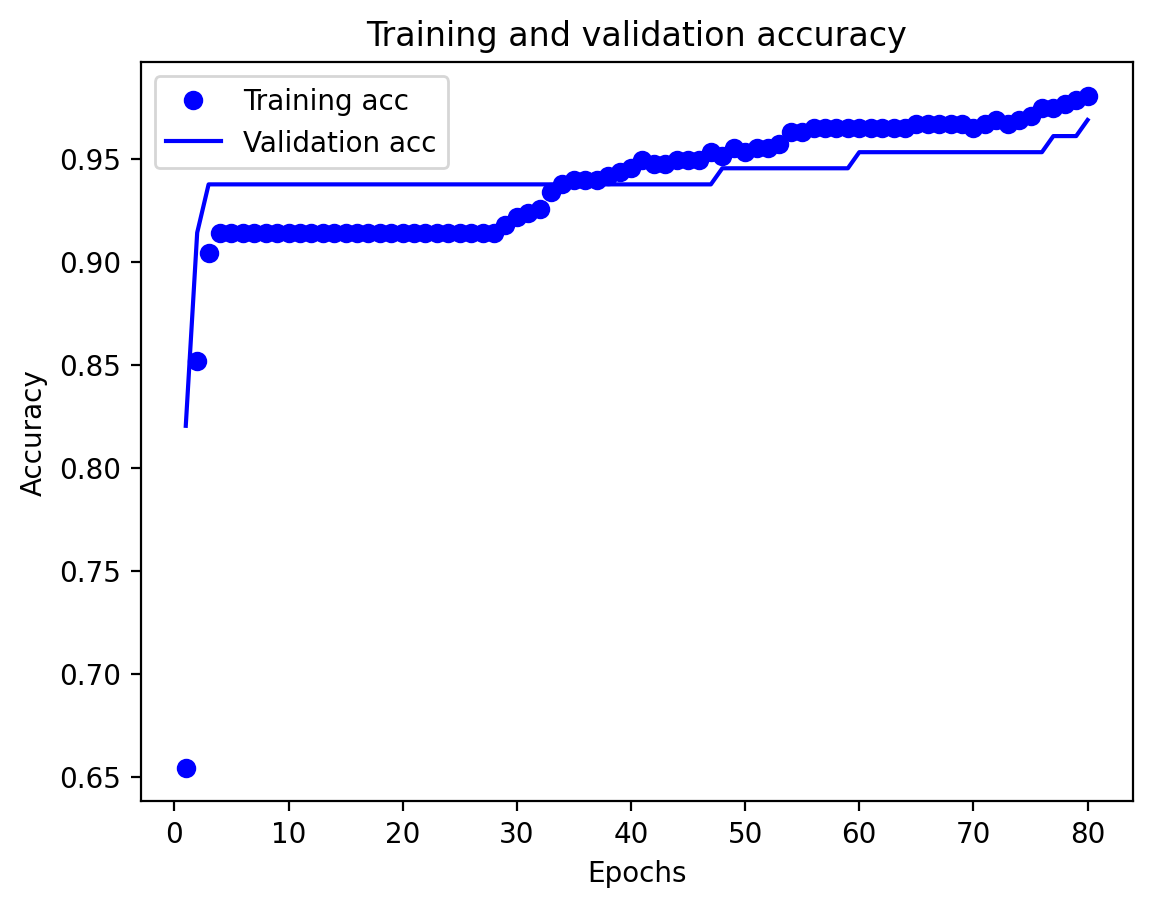

In [104]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### epoch 100

In [106]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(xm_train,
                    ym_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 54ms/step - loss: 0.6902 - accuracy: 0.5508 - val_loss: 0.6562 - val_accuracy: 0.8438
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.6418 - accuracy: 0.9043 - val_loss: 0.6141 - val_accuracy: 0.9297
Epoch 3/100
8/8 [==============================] - 0s 18ms/step - loss: 0.6059 - accuracy: 0.9141 - val_loss: 0.5765 - val_accuracy: 0.9375
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5721 - accuracy: 0.9141 - val_loss: 0.5386 - val_accuracy: 0.9375
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5397 - accuracy: 0.9141 - val_loss: 0.5030 - val_accuracy: 0.9375
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 0.5081 - accuracy: 0.9141 - val_loss: 0.4664 - val_accuracy: 0.9375
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.4775 - accuracy: 0.9141 - val_loss: 0.4334 - val_accuracy: 0.9375
Epoch 8/100
8/8 [====

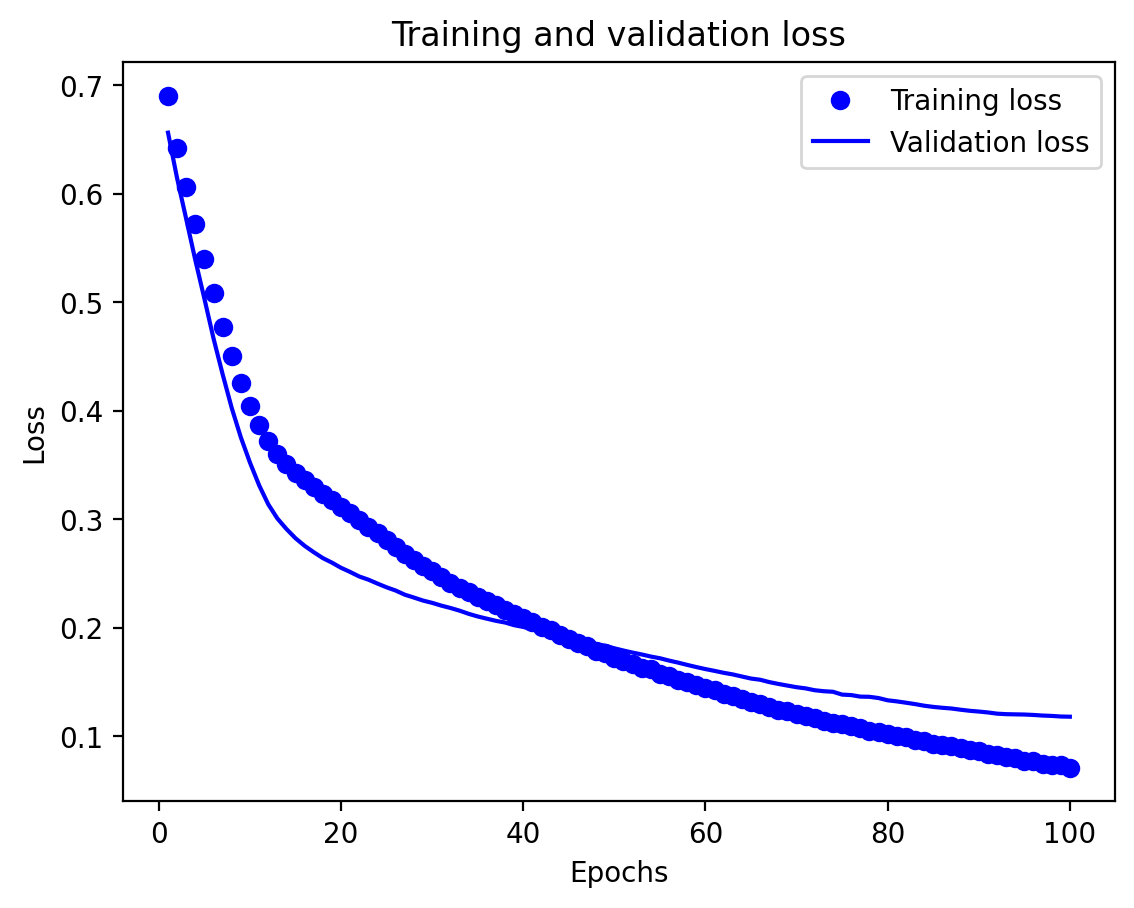

In [107]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

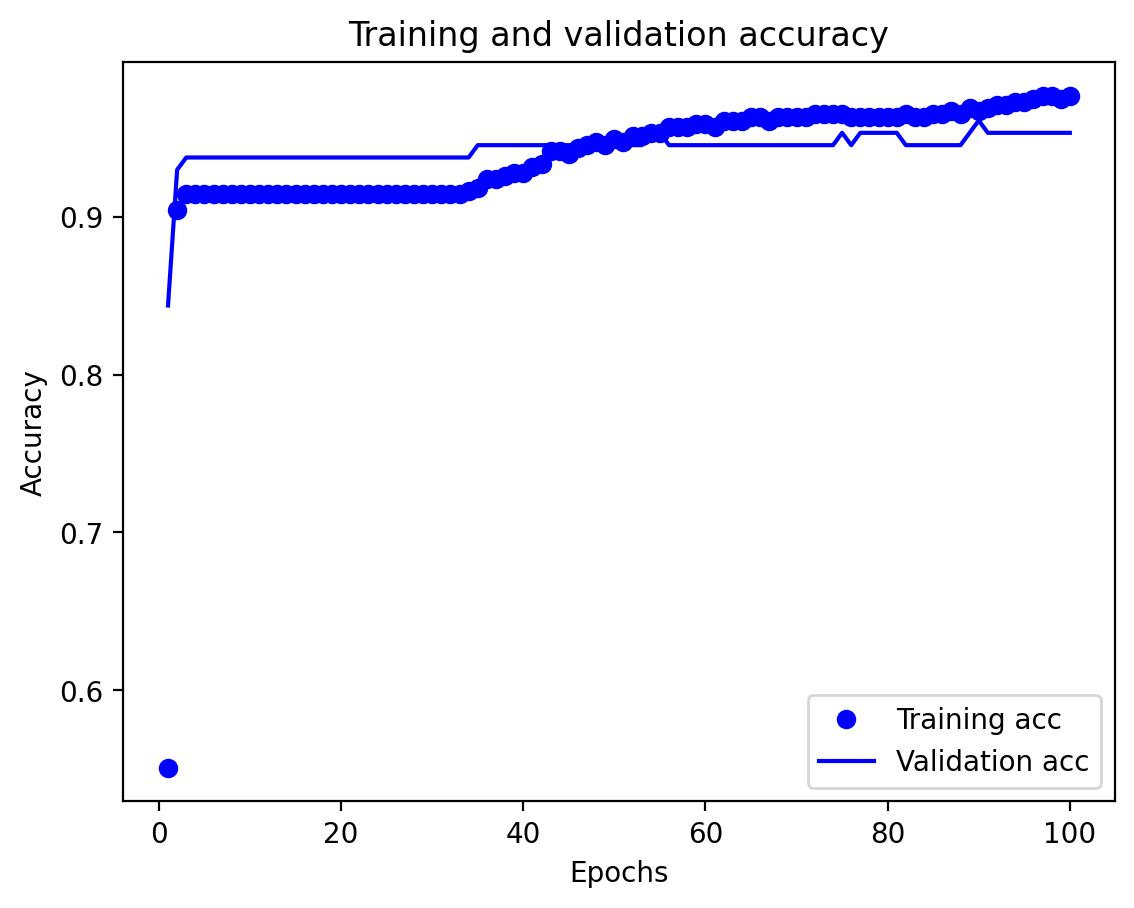

In [108]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### epoch 150

In [109]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(xm_train,
                    ym_train,
                    epochs=150,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/150
8/8 [==============================] - 1s 54ms/step - loss: 0.5746 - accuracy: 0.9023 - val_loss: 0.5134 - val_accuracy: 0.9375
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5076 - accuracy: 0.9141 - val_loss: 0.4532 - val_accuracy: 0.9375
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.4613 - accuracy: 0.9141 - val_loss: 0.4068 - val_accuracy: 0.9375
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.4251 - accuracy: 0.9141 - val_loss: 0.3695 - val_accuracy: 0.9375
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.3972 - accuracy: 0.9141 - val_loss: 0.3410 - val_accuracy: 0.9375
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.3752 - accuracy: 0.9141 - val_loss: 0.3178 - val_accuracy: 0.9375
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.3579 - accuracy: 0.9141 - val_loss: 0.2992 - val_accuracy: 0.9375
Epoch 8/150
8/8 [====

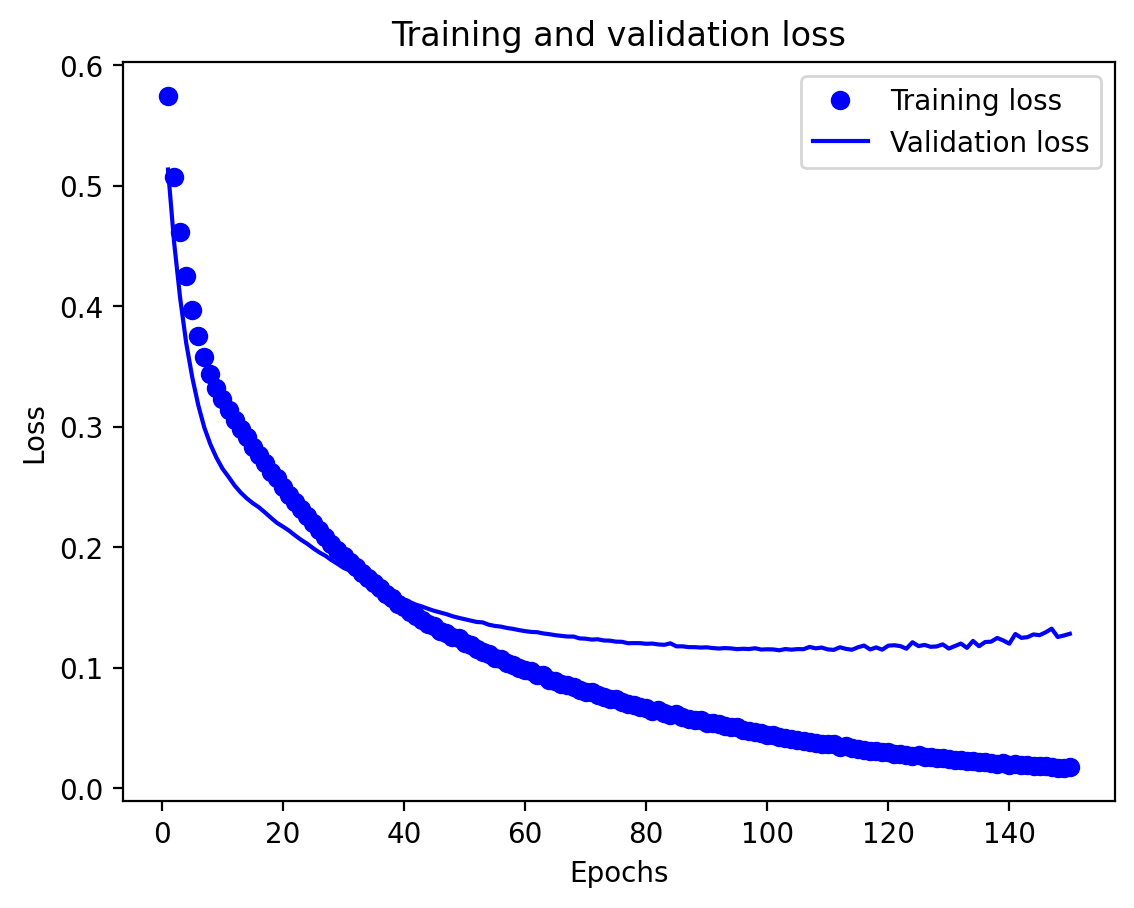

In [110]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

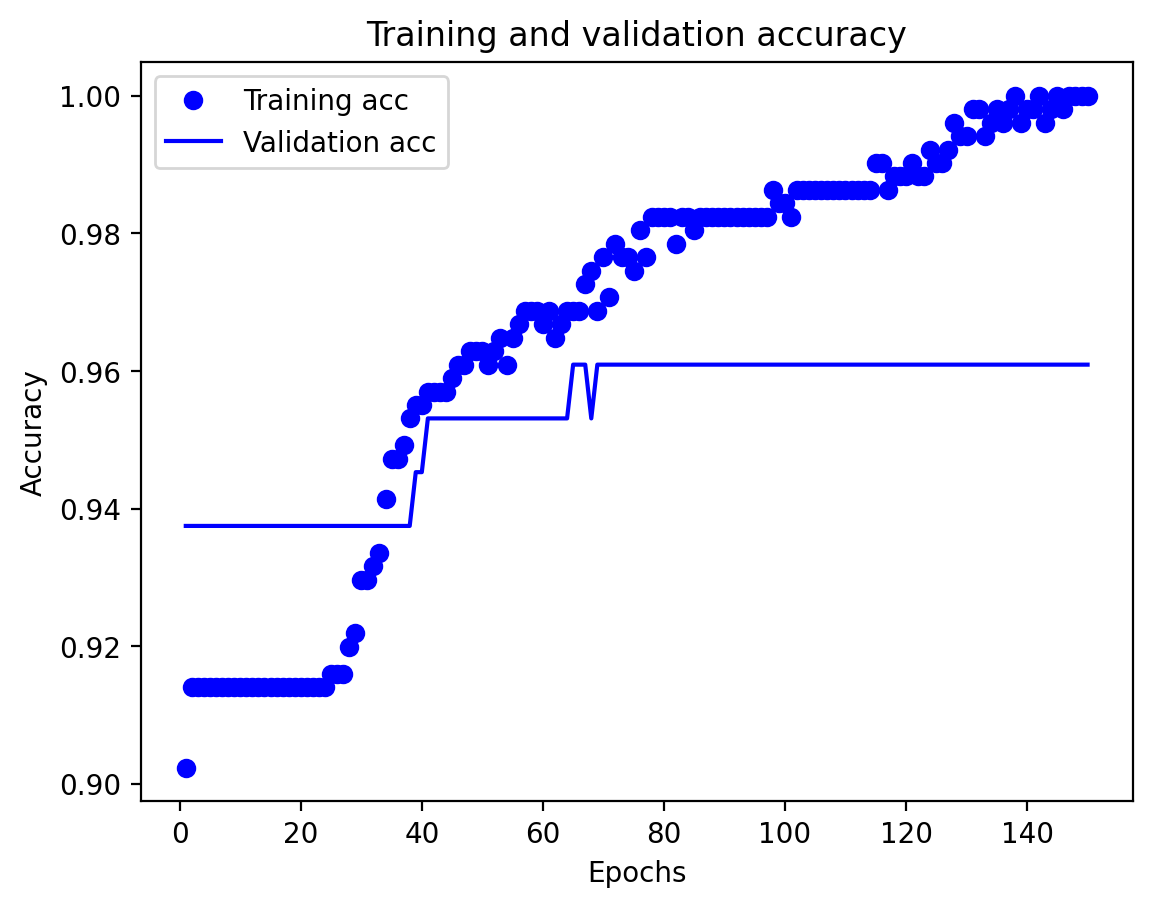

In [111]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# model = keras.Sequential([
#     layers.Dense(16, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])
# model.compile(optimizer="rmsprop",
#               loss="binary_crossentropy",
#               metrics=["accuracy"])

# history = model.fit(xm_train,
#                     ym_train,
#                     epochs=150,
#                     batch_size=64,
#                     validation_split=0.2)
# results = model.evaluate(X_test, y_test)
# results

### RobustScaler

In [112]:
pokemon_rs = rs.fit_transform(pokemon_f)
xrs = pd.DataFrame(pokemon_rs, columns=features)
xrs.head(2)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,Forme,Mega,Mewtwo,Deoxys,Kyurem,Latias,Latios,Kyogre,Groudon,Hoopa,Poison,Ground,Flying,Normal,Water,Fire,Electric,Rock,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,-0.713514,-0.666667,-0.577778,-0.525,0.000000,-0.125,-0.444444,-0.666667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.243243,-0.166667,-0.288889,-0.175,0.331492,0.250,-0.111111,-0.666667,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [113]:
yrs = pokemon['Legendary']
xrs_train, xrs_test, yrs_train, yrs_test = train_test_split(xrs, yrs, test_size=0.2, random_state=15)

In [114]:
model = create_model()

checkpoint_path = "training_rs/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001, verbose = 1),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose =1)
]

history_f = model.fit(xrs_train,
                    yrs_train,
                    epochs=300,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=keras_callbacks)

Epoch 1/300
1/8 [==>...........................] - ETA: 4s - loss: 0.7746 - accuracy: 0.2656
Epoch 1: val_loss improved from inf to 0.64083, saving model to training_rs/cp.ckpt
8/8 [==============================] - 1s 113ms/step - loss: 0.7041 - accuracy: 0.5332 - val_loss: 0.6408 - val_accuracy: 0.7578
Epoch 2/300
1/8 [==>...........................] - ETA: 0s - loss: 0.6632 - accuracy: 0.7188
Epoch 2: val_loss improved from 0.64083 to 0.58336, saving model to training_rs/cp.ckpt
8/8 [==============================] - 1s 83ms/step - loss: 0.6259 - accuracy: 0.8105 - val_loss: 0.5834 - val_accuracy: 0.8750
Epoch 3/300
1/8 [==>...........................] - ETA: 0s - loss: 0.5915 - accuracy: 0.8281
Epoch 3: val_loss improved from 0.58336 to 0.53836, saving model to training_rs/cp.ckpt
8/8 [==============================] - 1s 81ms/step - loss: 0.5769 - accuracy: 0.8809 - val_loss: 0.5384 - val_accuracy: 0.9297
Epoch 4/300
1/8 [==>...........................] - ETA: 0s - loss: 0.5727 - 

8/8 [==============================] - 1s 164ms/step - loss: 0.3517 - accuracy: 0.9141 - val_loss: 0.3194 - val_accuracy: 0.9375
Epoch 11/300
1/8 [==>...........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.9062
Epoch 11: val_loss improved from 0.31938 to 0.29759, saving model to training_rs/cp.ckpt
8/8 [==============================] - 1s 83ms/step - loss: 0.3276 - accuracy: 0.9141 - val_loss: 0.2976 - val_accuracy: 0.9375
Epoch 12/300
1/8 [==>...........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.9062
Epoch 12: val_loss improved from 0.29759 to 0.27770, saving model to training_rs/cp.ckpt
8/8 [==============================] - 1s 80ms/step - loss: 0.3050 - accuracy: 0.9141 - val_loss: 0.2777 - val_accuracy: 0.9375
Epoch 13/300
1/8 [==>...........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.8594
Epoch 13: val_loss improved from 0.27770 to 0.26049, saving model to training_rs/cp.ckpt
8/8 [==============================] - 1s 100ms/step - loss: 0.284

In [115]:
model = create_model()
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(xrs_test, yrs_test, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

5/5 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.9375
Restored model, accuracy: 93.75%


###### Robust : 93.75%의 정확도

### StandardScaler

In [116]:
pokemon_ss = ss.fit_transform(pokemon_f)
xss = pd.DataFrame(pokemon_ss, columns=features)
xss.head(2)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,Forme,Mega,Mewtwo,Deoxys,Kyurem,Latias,Latios,Kyogre,Groudon,Hoopa,Poison,Ground,Flying,Normal,Water,Fire,Electric,Rock,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.23913,-0.248189,-0.801503,-1.399637,0.037386,-0.464549,-0.164188,-0.255434,-0.061352,-0.070888,-0.061352,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,3.450105,-0.302333,-0.380121,-0.382272,-0.43237,-0.294884,-0.258199,-0.279584,-0.260942,-0.229416,-0.255434,-0.246998,-0.356034,-0.223313,-0.314485,2.724161,-0.258199,-0.266365
1,-0.251088,-0.362822,-0.524130,-0.347917,0.21956,0.291156,-0.285015,-1.399637,-0.433613,-0.464549,-0.164188,-0.255434,-0.061352,-0.070888,-0.061352,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,3.450105,-0.302333,-0.380121,-0.382272,-0.43237,-0.294884,-0.258199,-0.279584,-0.260942,-0.229416,-0.255434,-0.246998,-0.356034,-0.223313,-0.314485,2.724161,-0.258199,-0.266365


In [117]:
yss = pokemon['Legendary']
xss_train, xss_test, yss_train, yss_test = train_test_split(xss, yss, test_size=0.2, random_state=15)

In [118]:
model = create_model()

checkpoint_path = "training_ss/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001, verbose = 1),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose =1)
]

history_f = model.fit(xss_train,
                    yss_train,
                    epochs=300,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=keras_callbacks)

Epoch 1/300
7/8 [=========================>....] - ETA: 0s - loss: 0.6697 - accuracy: 0.6272
Epoch 1: val_loss improved from inf to 0.63540, saving model to training_ss/cp.ckpt
8/8 [==============================] - 4s 350ms/step - loss: 0.6667 - accuracy: 0.6328 - val_loss: 0.6354 - val_accuracy: 0.7266
Epoch 2/300
1/8 [==>...........................] - ETA: 0s - loss: 0.5734 - accuracy: 0.7656
Epoch 2: val_loss improved from 0.63540 to 0.58030, saving model to training_ss/cp.ckpt
8/8 [==============================] - 2s 261ms/step - loss: 0.5821 - accuracy: 0.7812 - val_loss: 0.5803 - val_accuracy: 0.8203
Epoch 3/300
1/8 [==>...........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.8594
Epoch 3: val_loss improved from 0.58030 to 0.53976, saving model to training_ss/cp.ckpt
8/8 [==============================] - 2s 223ms/step - loss: 0.5315 - accuracy: 0.8438 - val_loss: 0.5398 - val_accuracy: 0.8594
Epoch 4/300
1/8 [==>...........................] - ETA: 0s - loss: 0.5130 

8/8 [==============================] - 1s 188ms/step - loss: 0.3932 - accuracy: 0.9160 - val_loss: 0.4199 - val_accuracy: 0.9062
Epoch 8/300
1/8 [==>...........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.9375
Epoch 8: val_loss improved from 0.41994 to 0.39648, saving model to training_ss/cp.ckpt
8/8 [==============================] - 1s 89ms/step - loss: 0.3659 - accuracy: 0.9160 - val_loss: 0.3965 - val_accuracy: 0.9141
Epoch 9/300
1/8 [==>...........................] - ETA: 0s - loss: 0.3926 - accuracy: 0.8438
Epoch 9: val_loss improved from 0.39648 to 0.37605, saving model to training_ss/cp.ckpt
8/8 [==============================] - 1s 112ms/step - loss: 0.3415 - accuracy: 0.9160 - val_loss: 0.3760 - val_accuracy: 0.9219
Epoch 10/300
1/8 [==>...........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.9375
Epoch 10: val_loss improved from 0.37605 to 0.35724, saving model to training_ss/cp.ckpt
8/8 [==============================] - 1s 138ms/step - loss: 0.3193 -

In [119]:
model = create_model()
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(xss_test, yss_test, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

5/5 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9563
Restored model, accuracy: 95.63%


###### Standard : 95.63%의 정확도

# 총 정리

original data -> 전처리 데이터를 비교해보자면<br>
<br>
**decision tree**에서는    
accuracy 0.95 -> 0.96   
recall 0.62 -> 0.92   
<br>
**이진분류**에서는
accuracy  91.25 -> 91.25%
<br><br>
전처리데이터를 가지고 scaler 적용 시 <br>
**MinMax** : 95%<br>
**Robust** : 93.75%<br>
**Standard** : 95.63%<br>
의 정확도를 보였다.<br>
<br>
데이터 전처리 후에도 데이터간의 값의 범위차가 컸는데, 역시나 scaler 적용하니 정확도가 많이 올라가는게 보였다.

#회고

*   Dense layer 적용했을 떄, 전처리 데이터가 생각보다 결과가 잘 나오지 않아서 의아했다. 아직도 이유는 모르는 상태..
*   dataframe 자료를 Denselayer에 넣는 방법도 쉽지 않아서 잠시 헤맸었다.
*   모델학습 시 원래 하던것 처럼 fit을 하고, 그래프를 그려서 overfitting 지점을 찾으려고 했으나 그래프가 너무 들쭉날쭉 해서, 생각보다 쉽지 않아 earlystopping을 적용하려고 하니 modelcheckpoint도 적용해야하고, 진땀을 뺐으나 결국, 적용에 성공해 뿌듯했다.
*   dropout과 가중치규제도 적용한 모델을 만들고 싶었으나, 12시가 다 되어가는 관계로 여기서 그만...






#참조

출처: https://deep-deep-deep.tistory.com/55 [딥딥딥:티스토리]   
https://teddylee777.github.io/tensorflow/keras-%EC%BD%9C%EB%B0%B1%ED%95%A8%EC%88%98-vol-03/#google_vignette
https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ko   
https://wikidocs.net/179491
